# Search stocks

In [14]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [15]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt



In [16]:
yf.pdr_override()
# no need for requests or BeautifulSoup use read_html
df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[3]
# convert symbol column to list

tickers = df['Ticker'].values.tolist()
#t = [x.replace('.', '-') for x in tickers] 
print(tickers)
df
#yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'TEAM', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'FB', 'FAST', 'FISV', 'FOXA', 'FOX', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MRVL', 'MTCH', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'OKTA', 'PCAR', 'PAYX', 'PYPL', 'PTON', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'TCOM', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX', 'ZM']


Company Ticker             GICS Sector  \
0               Activision Blizzard   ATVI  Communication Services   
1                        Adobe Inc.   ADBE  Information Technology   
2            Advanced Micro Devices    AMD  Information Technology   
3           Alexion Pharmaceuticals   ALXN             Health Care   
4                  Align Technology   ALGN             Health Care   
..                              ...    ...                     ...   
97   Walgreens Boots Alliance, Inc.    WBA        Consumer Staples   
98                    Workday, Inc.   WDAY  Information Technology   
99                 Xcel Energy Inc.    XEL               Utilities   
100                    Xilinx, Inc.   XLNX  Information Technology   
101       Zoom Video Communications     ZM  Information Technology   

                  GICS Sub-Industry  
0    Interactive Home Entertainment  
1              Application Software  
2                    Semiconductors  
3                   Pharmaceuticals  
4              Health Care Supplies  
..                              ...  
97                      Drug Retail  
98             Application Software  
99                  Multi-Utilities  
100                  Semiconductors  
101            Application Software  

[102 rows x 4 columns]

In [17]:
ma_count = 21

print(datetime(2021,1,1))
data = pdr.get_data_yahoo(tickers, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


2021-01-01 00:00:00
[*********************100%***********************]  102 of 102 completed


AAPL        ADBE         ADI         ADP        ADSK  \
Date                                                                     
2021-07-02  139.960007  593.070007  170.669998  201.479996  297.739990   
2021-07-06  142.020004  596.900024  168.320007  201.110001  295.600006   
2021-07-07  144.570007  605.770020  165.429993  203.339996  296.109985   
2021-07-08  143.240005  605.950012  163.910004  201.860001  294.470001   
2021-07-09  145.110001  604.500000  166.270004  203.720001  295.380005   

                  AEP        ALGN        ALXN        AMAT        AMD  ...  \
Date                                                                  ...   
2021-07-02  85.199997  624.169983  186.279999  138.160004  94.699997  ...   
2021-07-06  85.239998  604.669983  184.539993  136.779999  94.470001  ...   
2021-07-07  85.620003  612.219971  184.270004  134.869995  90.540001  ...   
2021-07-08  85.309998  616.789978  183.399994  132.529999  89.739998  ...   
2021-07-09  85.389999  627.190002  184.199997  134.899994  90.900002  ...   

                  TSLA         TXN        VRSK        VRSN        VRTX  \
Date                                                                     
2021-07-02  678.900024  192.210007  177.500000  231.330002  200.539993   
2021-07-06  659.580017  191.199997  177.610001  231.470001  200.050003   
2021-07-07  644.650024  189.779999  182.089996  232.830002  198.990005   
2021-07-08  652.809998  188.240005  181.210007  231.809998  197.740005   
2021-07-09  656.950012  190.270004  181.710007  233.029999  198.160004   

                  WBA        WDAY        XEL        XLNX          ZM  
Date                                                                  
2021-07-02  48.169998  238.300003  66.820000  144.559998  388.890015  
2021-07-06  47.700001  238.550003  67.070000  144.169998  401.119995  
2021-07-07  47.490002  238.649994  67.690002  137.440002  393.910004  
2021-07-08  46.720001  237.089996  67.500000  133.770004  386.010010  
2021-07-09  47.410000  239.940002  67.669998  135.589996  385.079987  

[5 rows x 102 columns]

In [18]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 10].size)
lead_comps_df = df[df['count'] >= 10]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

51


name  count   ma_diff  ma_size ma_type
0    AAPL     24  7.575404       21   daily
32   IDXX     35  7.280127       21   daily
9    AMZN     23  6.603583       21   daily
48   ORLY     17  6.349483       21   daily
41   MRNA     32  6.082191       21   daily
37   LULU     25  5.680422       21   daily
54   REGN     22  5.679346       21   daily
23   DOCU     30  5.576596       21   daily
60   SWKS     14  5.560465       21   daily
49   PAYX     14  5.434365       21   daily
20   CPRT     20  5.349546       21   daily
47   OKTA     16  5.146755       21   daily
1    ADBE     33  5.140709       21   daily
19   COST     14  5.061017       21   daily
52   PYPL     33  5.056162       21   daily
7     AMD     31  4.878279       21   daily
35   ISRG     25  4.854871       21   daily
46   NVDA     35  4.607923       21   daily
44   MTCH     19  4.596102       21   daily
22   CTAS     21  4.366125       21   daily
43   MSFT     25  4.052284       21   daily
56   SBUX     10  3.999580       21   daily
24   DXCM     30  3.983945       21   daily
45   NFLX     16  3.933091       21   daily
34   INTU     39  3.895645       21   daily
65   VRSK     11  3.871881       21   daily
17   CHTR     14  3.751825       21   daily
58   SNPS     35  3.542295       21   daily
40   MELI     21  3.517407       21   daily
13   CDNS     25  3.231278       21   daily
14    CDW     14  3.186779       21   daily
61   TEAM     25  3.147204       21   daily
25   EBAY     14  3.007619       21   daily
10   ANSS     14  2.978479       21   daily
3    ADSK     14  2.954369       21   daily
59   SPLK     21  2.862024       21   daily
66   VRSN     16  2.828307       21   daily
55   ROST     12  2.666005       21   daily
53   QCOM     14  2.602692       21   daily
42   MRVL     35  2.404846       21   daily
33   ILMN     35  2.374608       21   daily
27     FB     14  2.282264       21   daily
31  GOOGL     33  2.211251       21   daily
71     ZM     35  2.032011       21   daily
30   GOOG     35  1.995385       21   daily
63   TSLA     17  1.780352       21   daily
70   XLNX     33  1.177576       21   daily
68   WDAY     21  1.172205       21   daily
8    AMGN     11  1.143987       21   daily
6    ALXN     65  0.946782       21   daily
51   PTON     16  0.759775       21   daily

<ipython-input-19-1514944d5d33>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


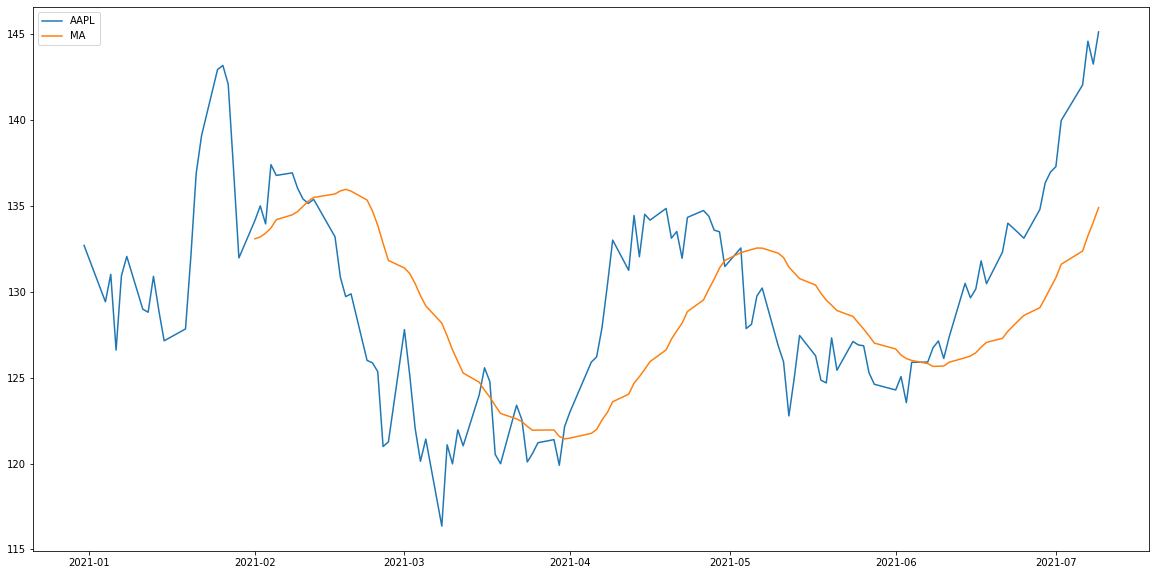

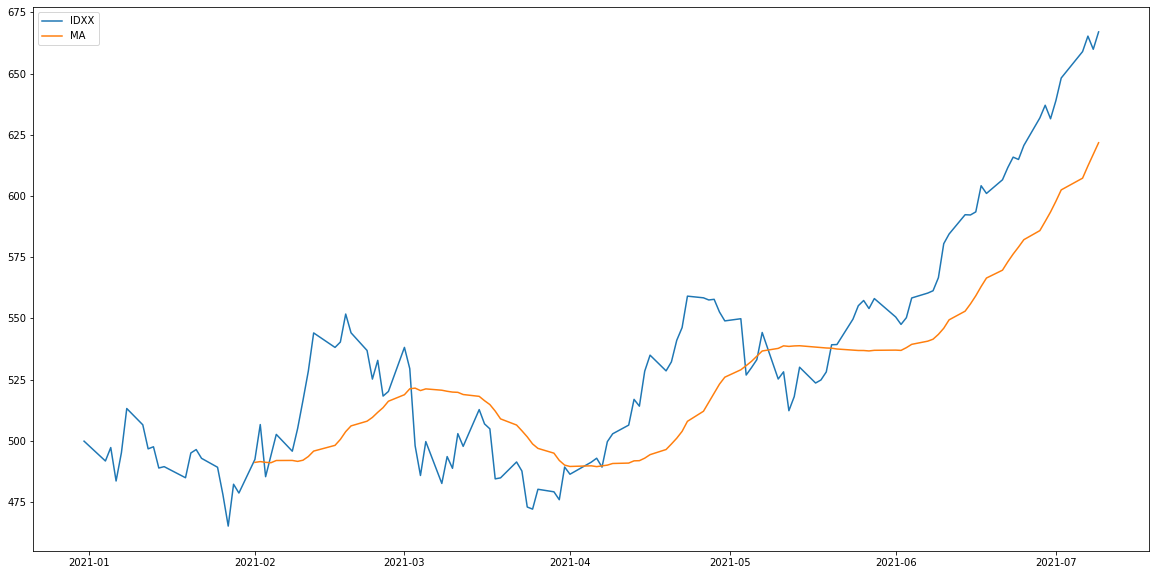

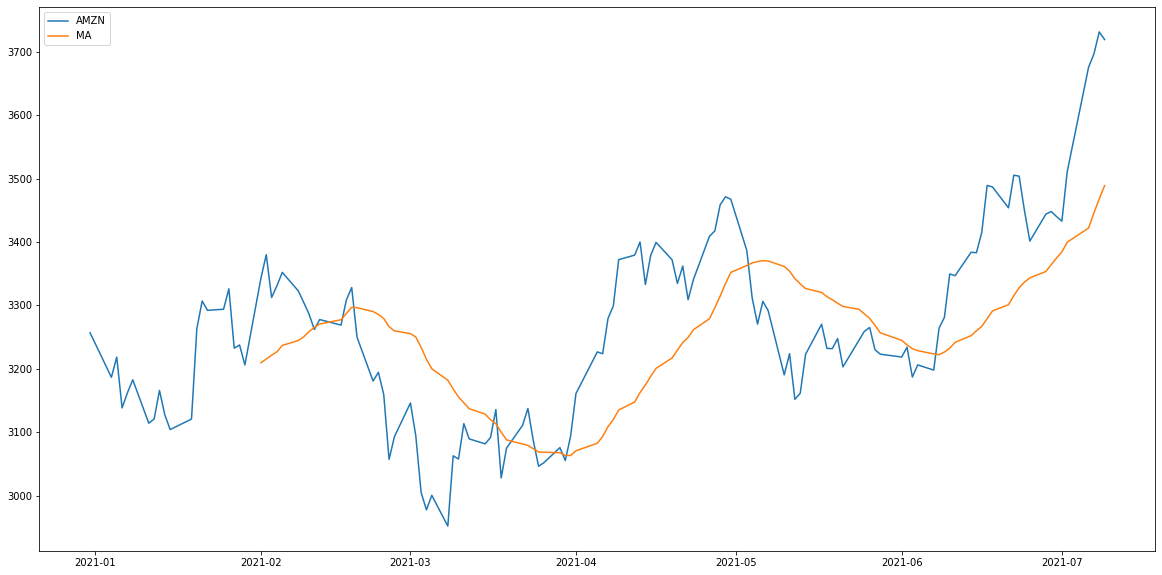

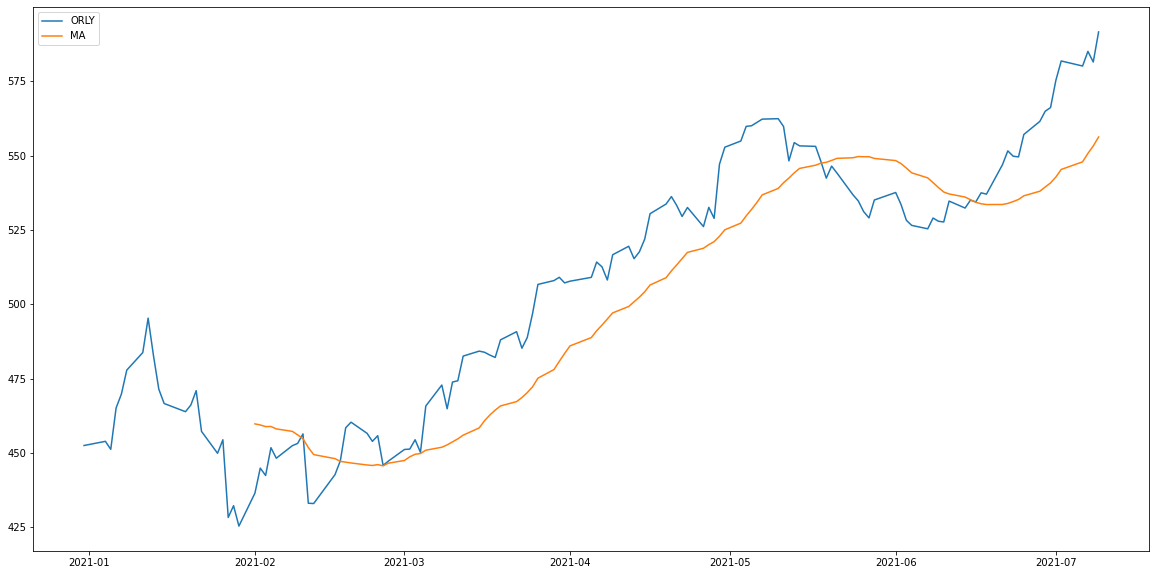

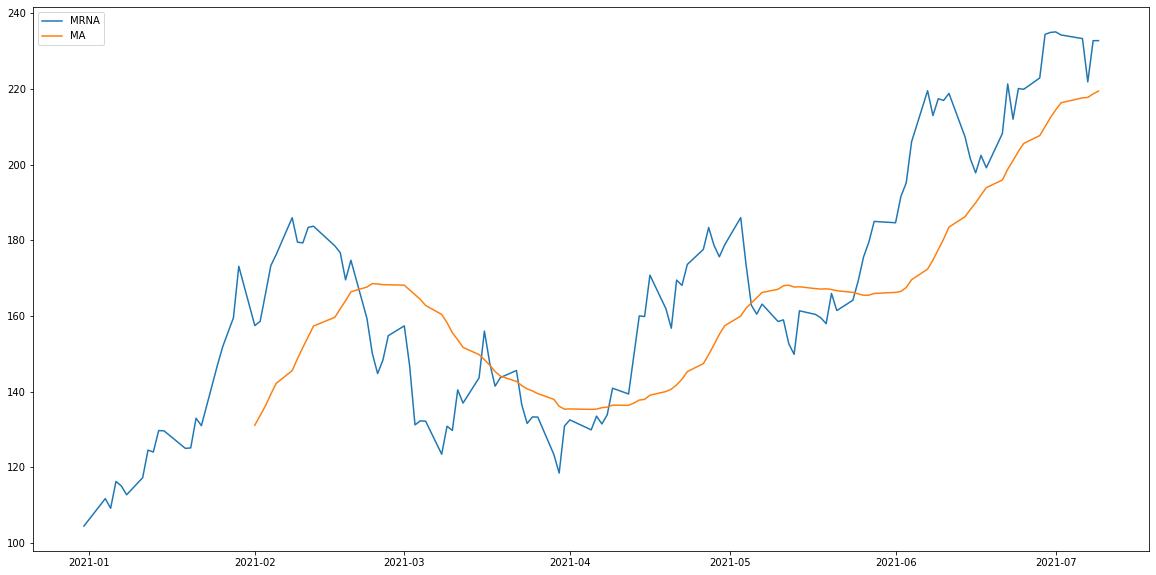

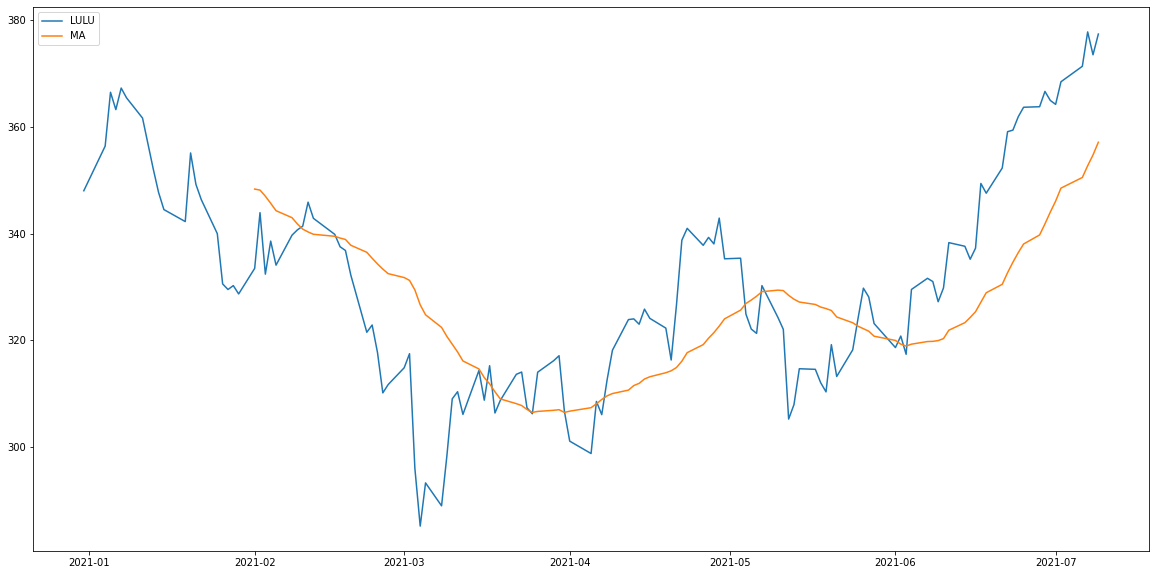

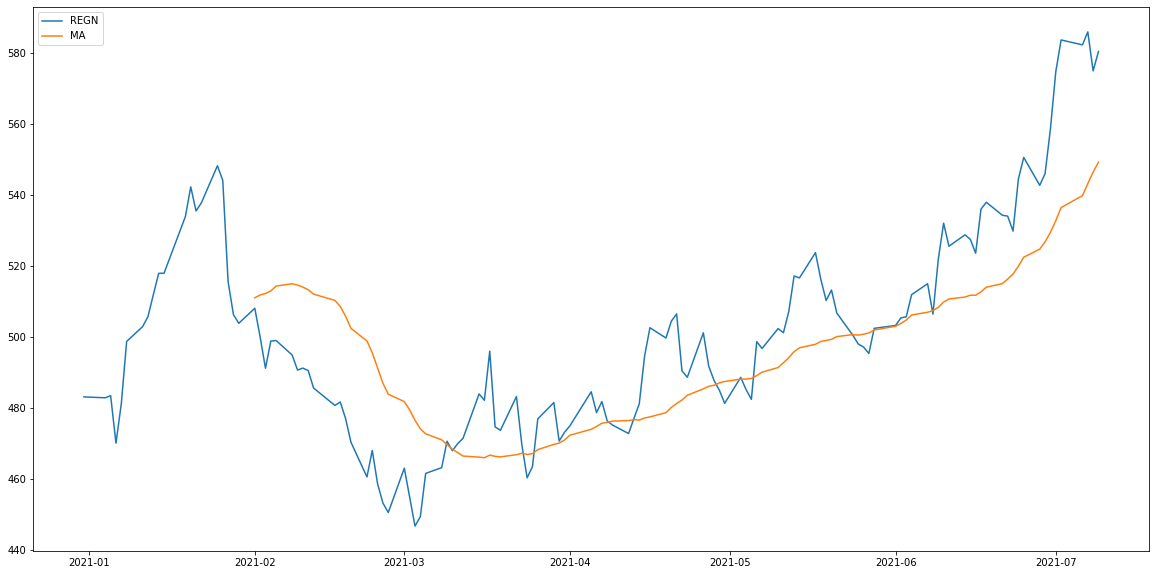

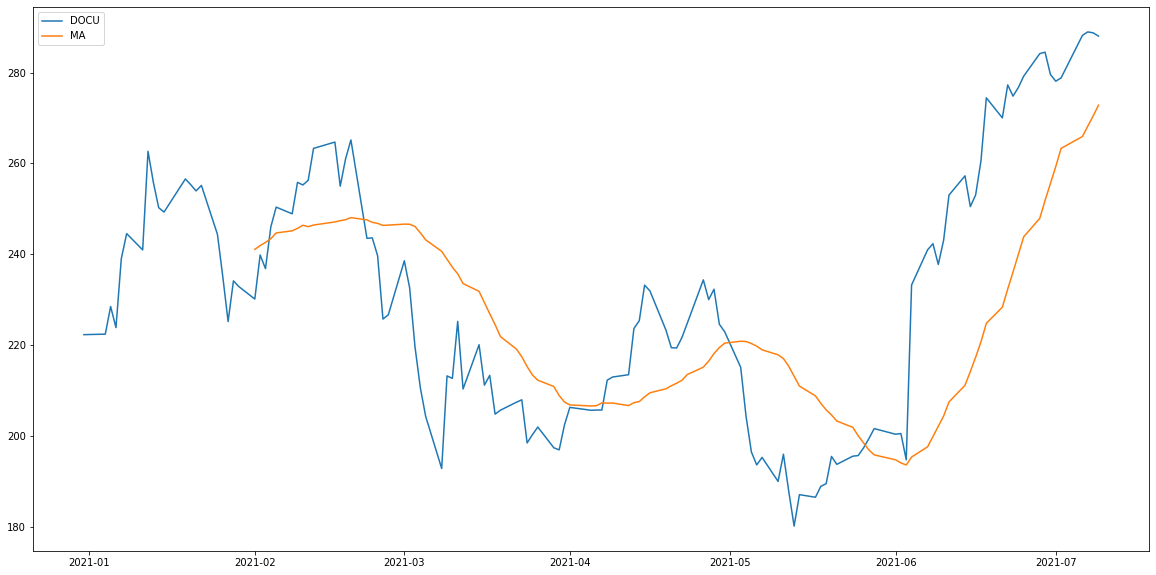

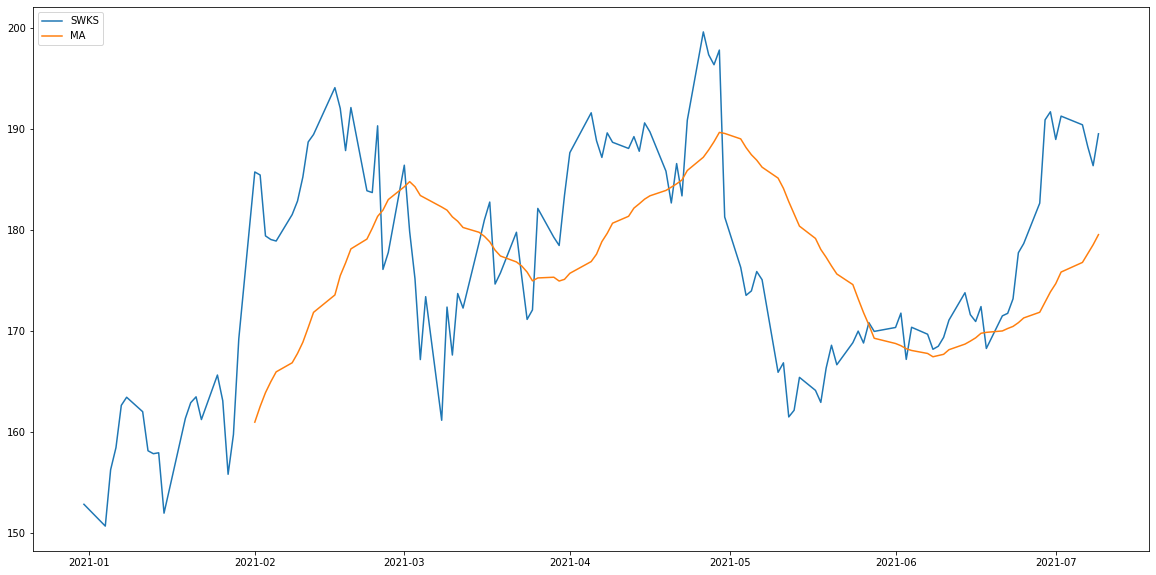

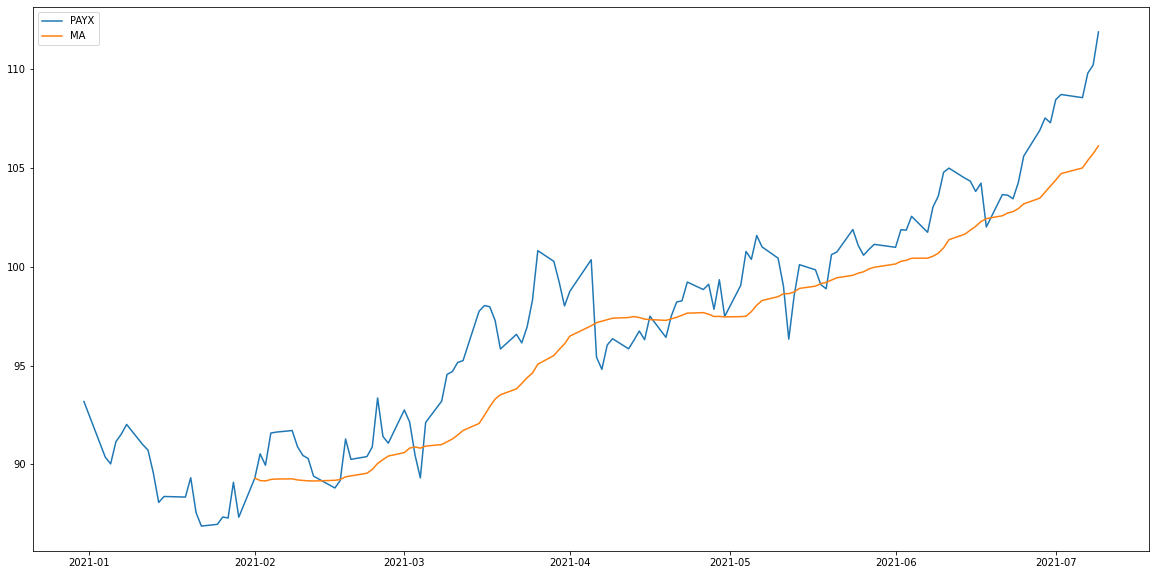

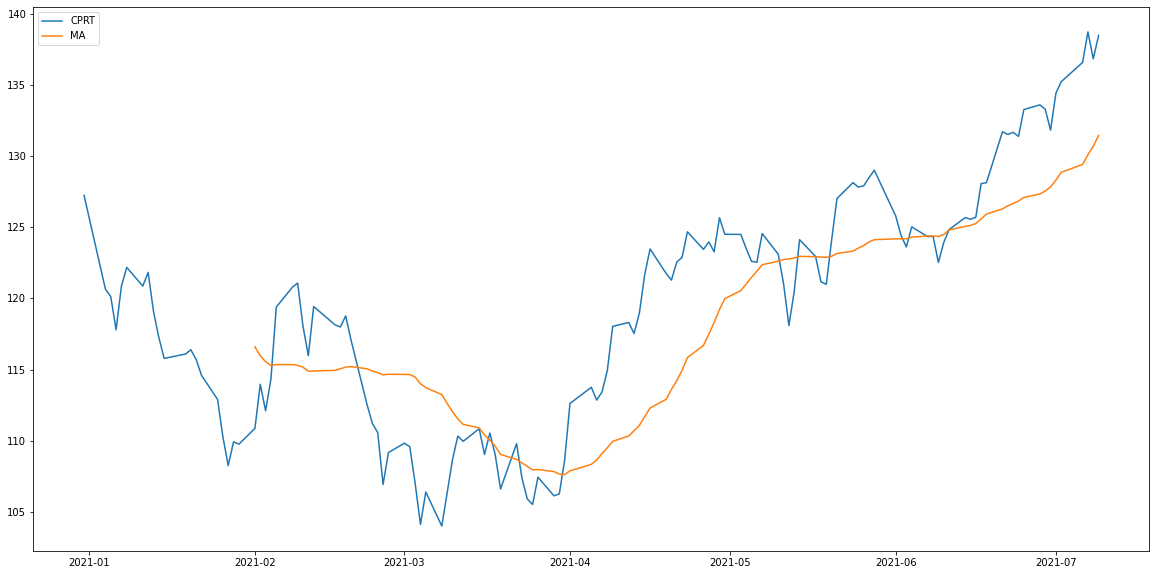

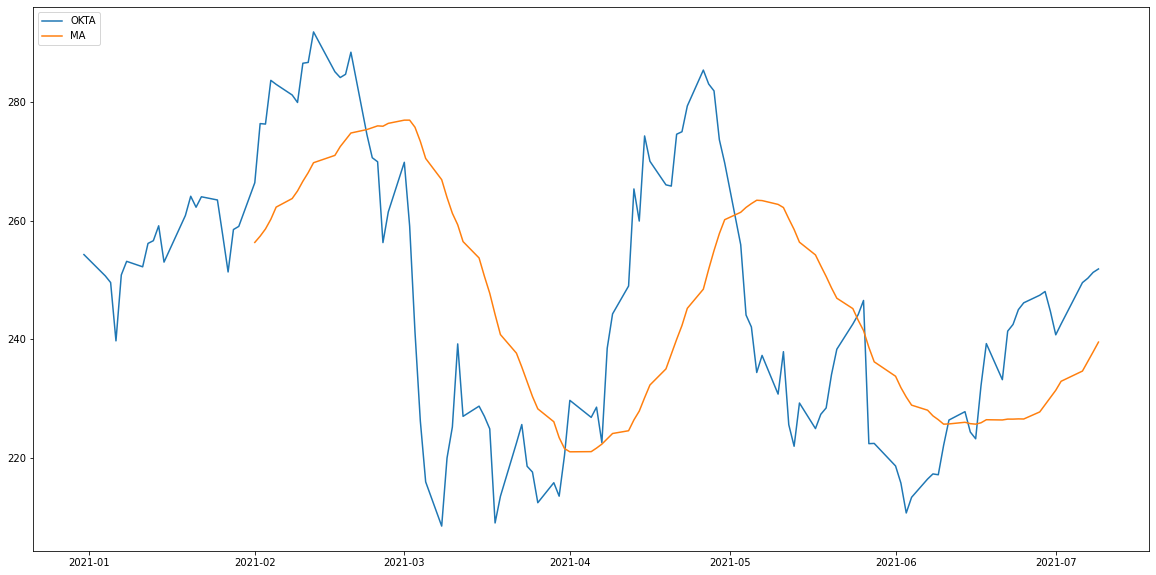

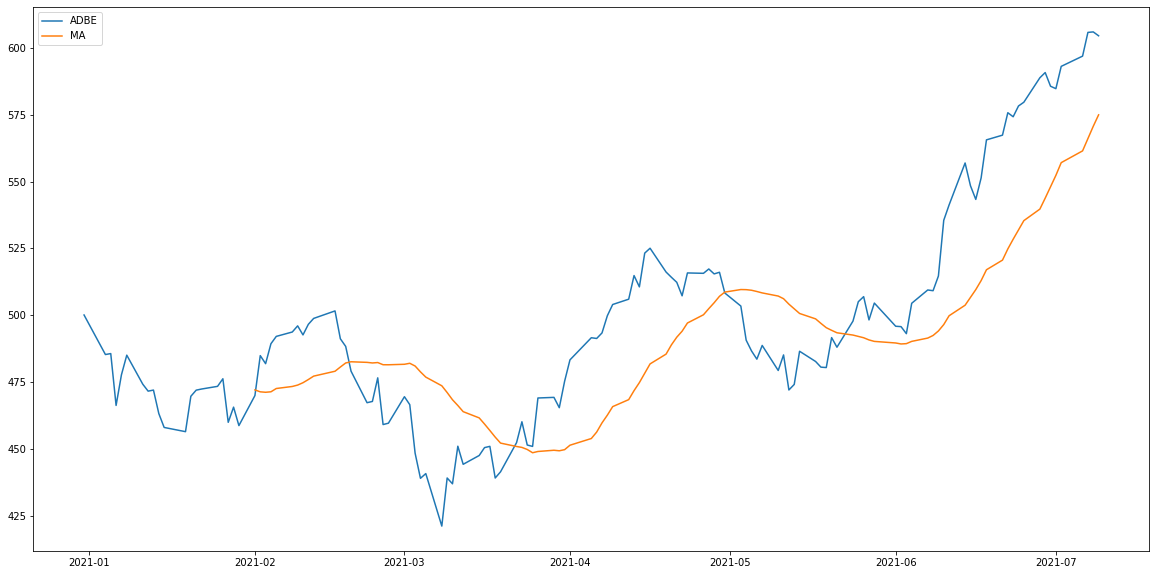

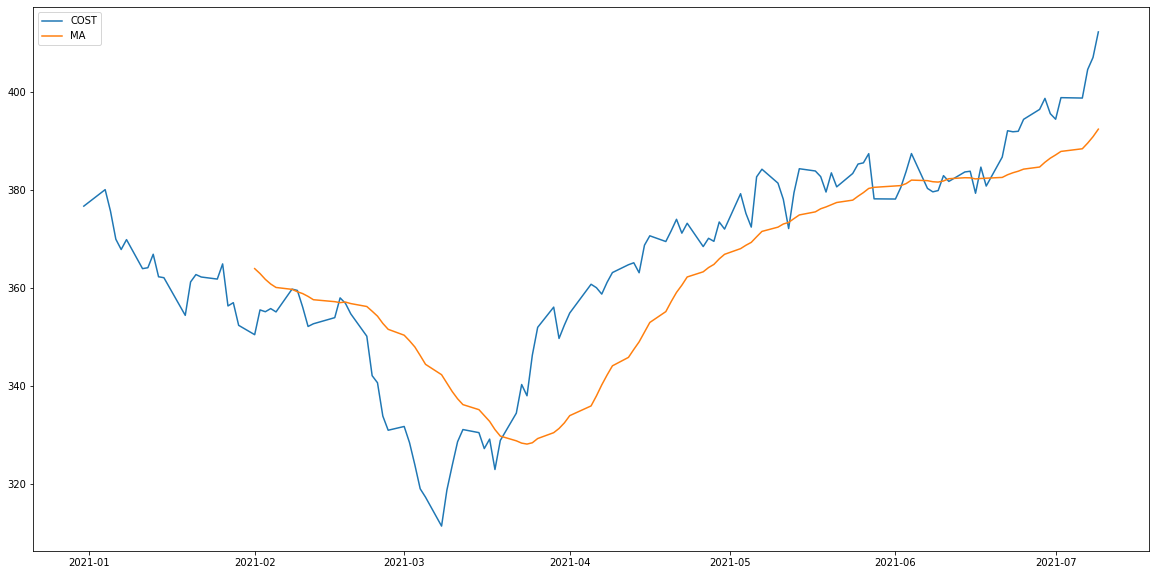

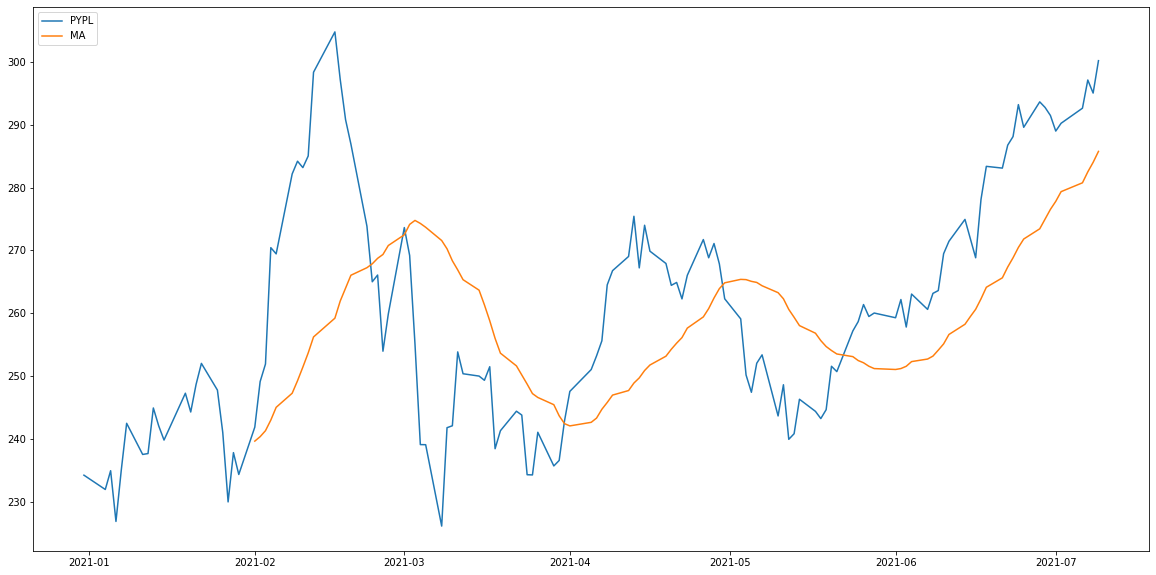

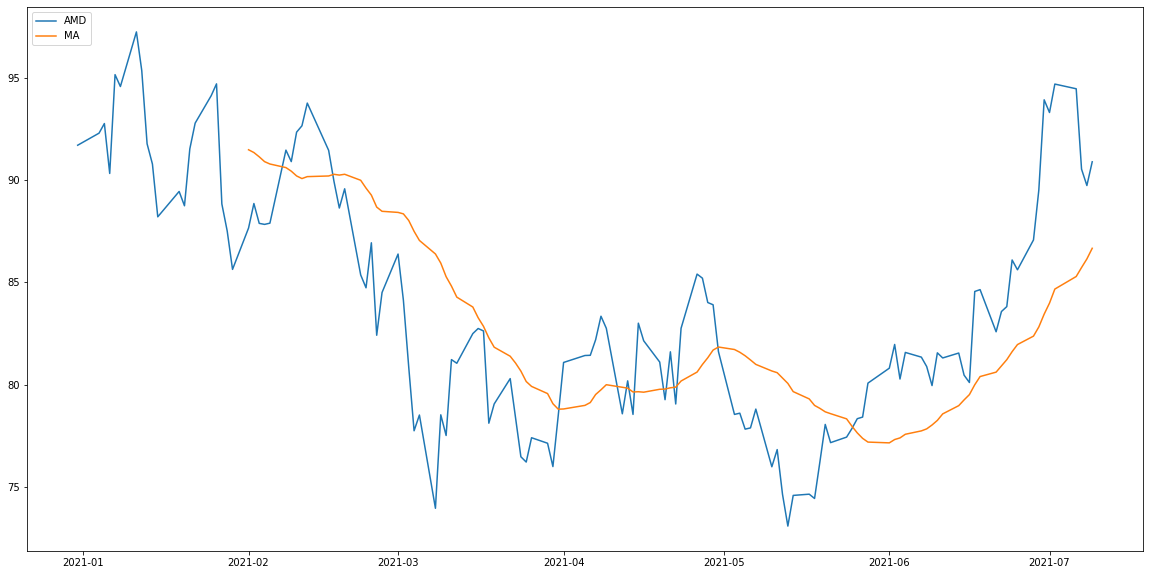

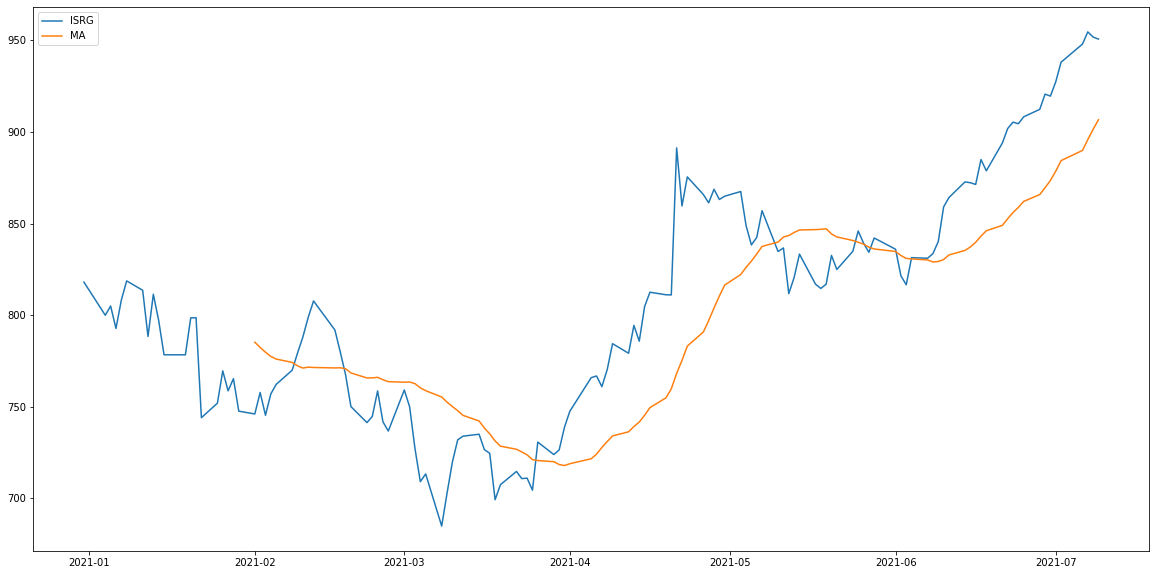

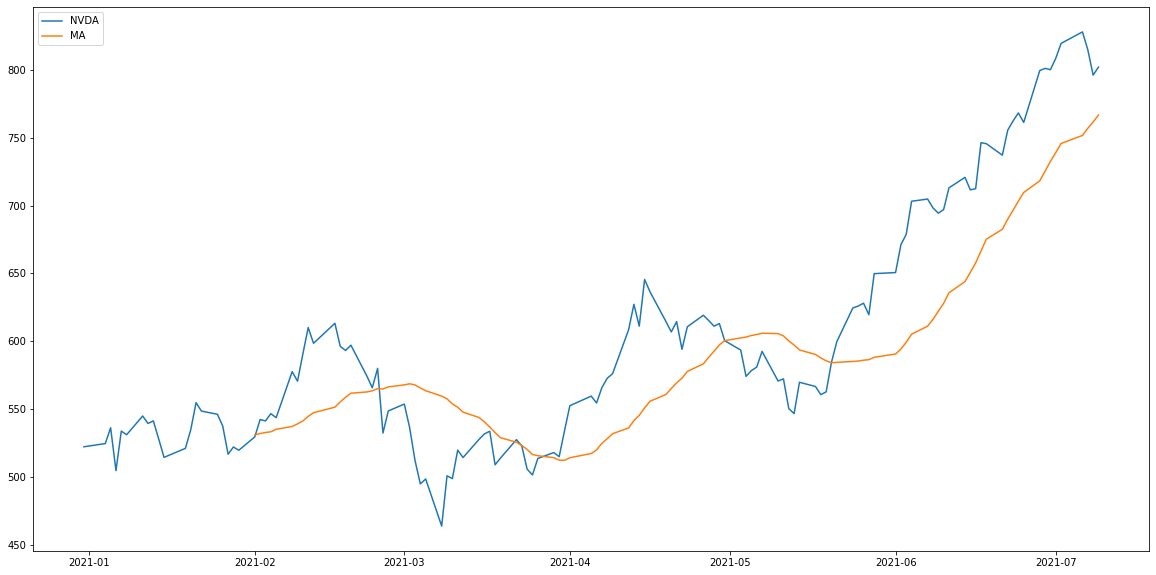

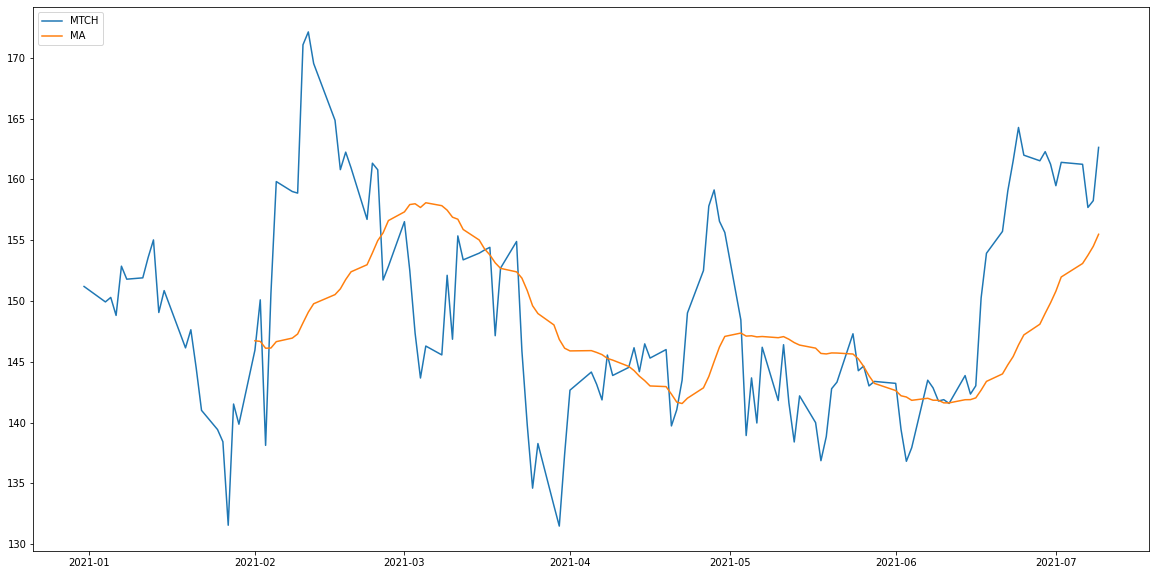

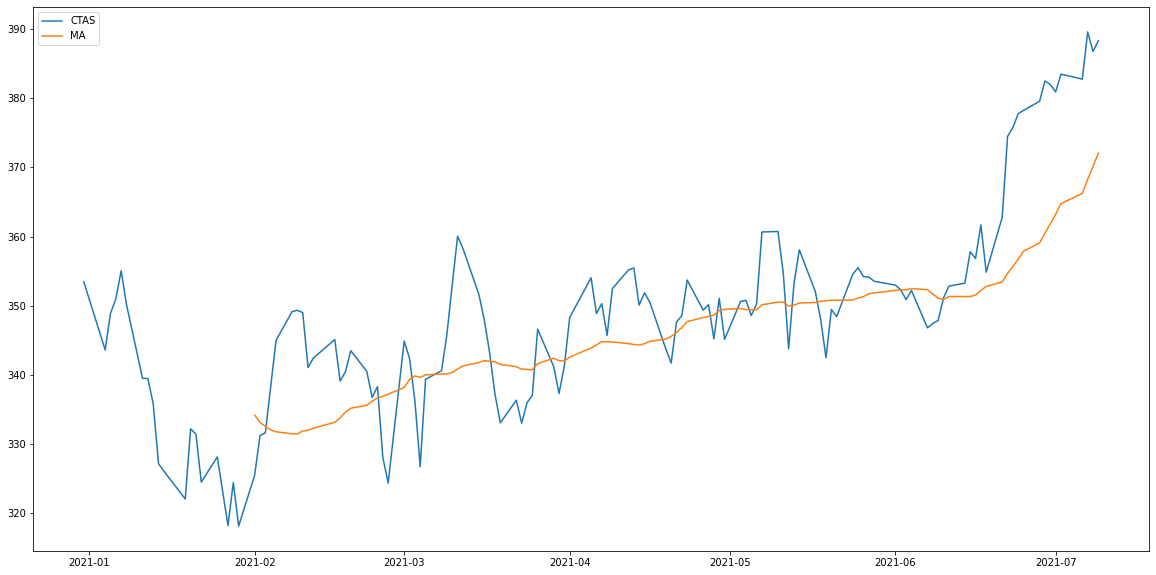

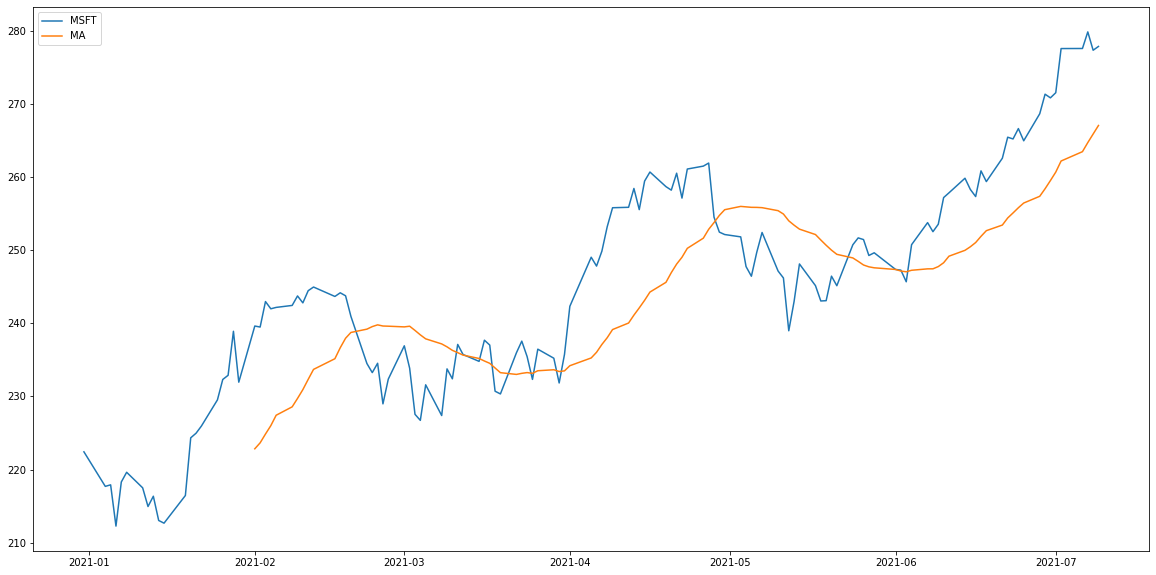

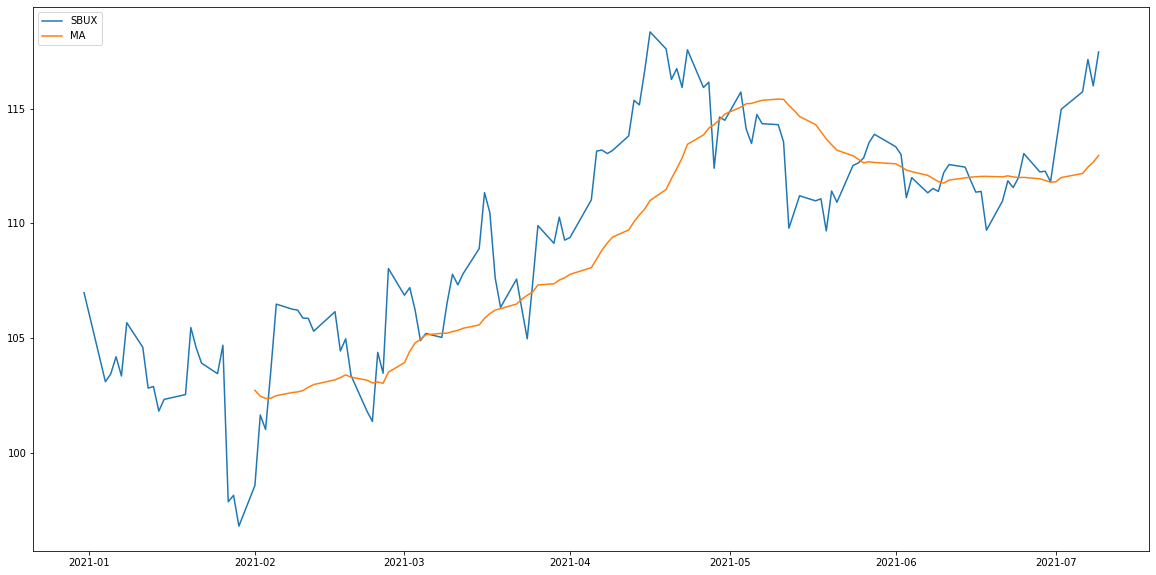

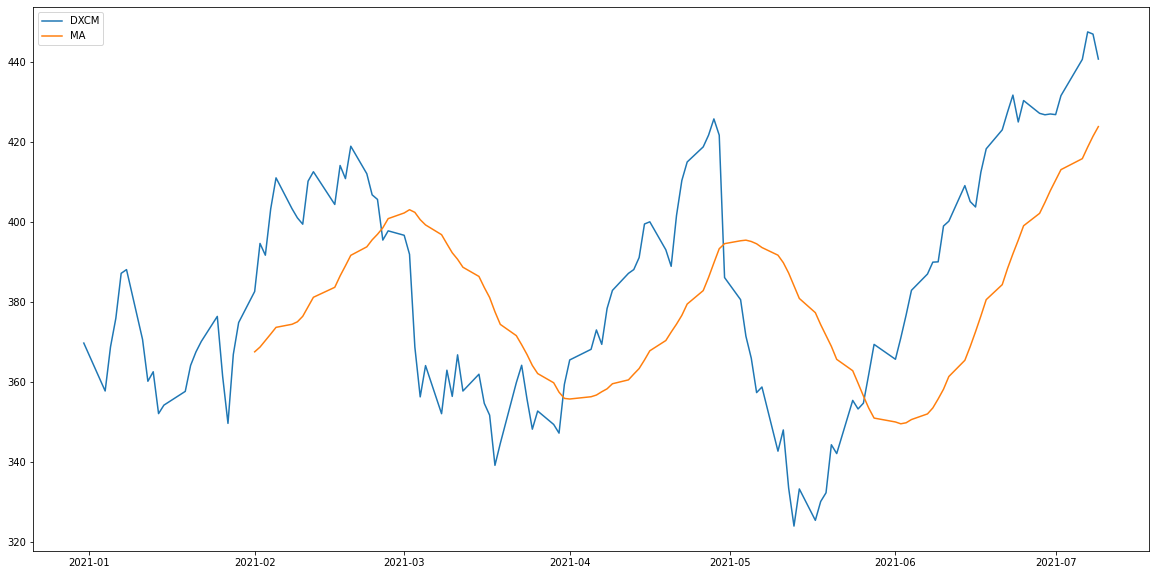

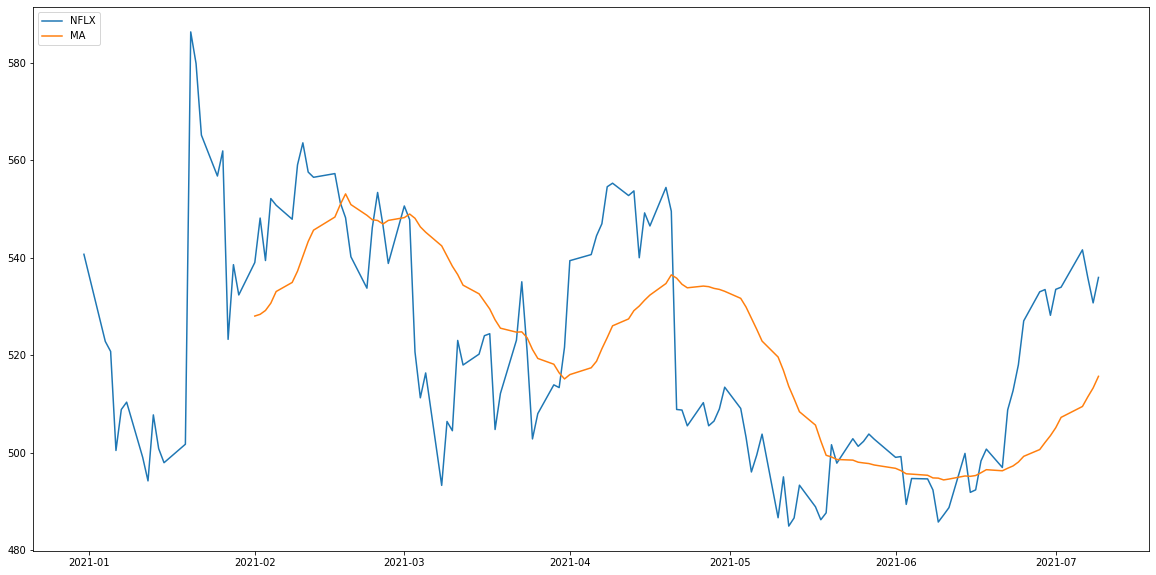

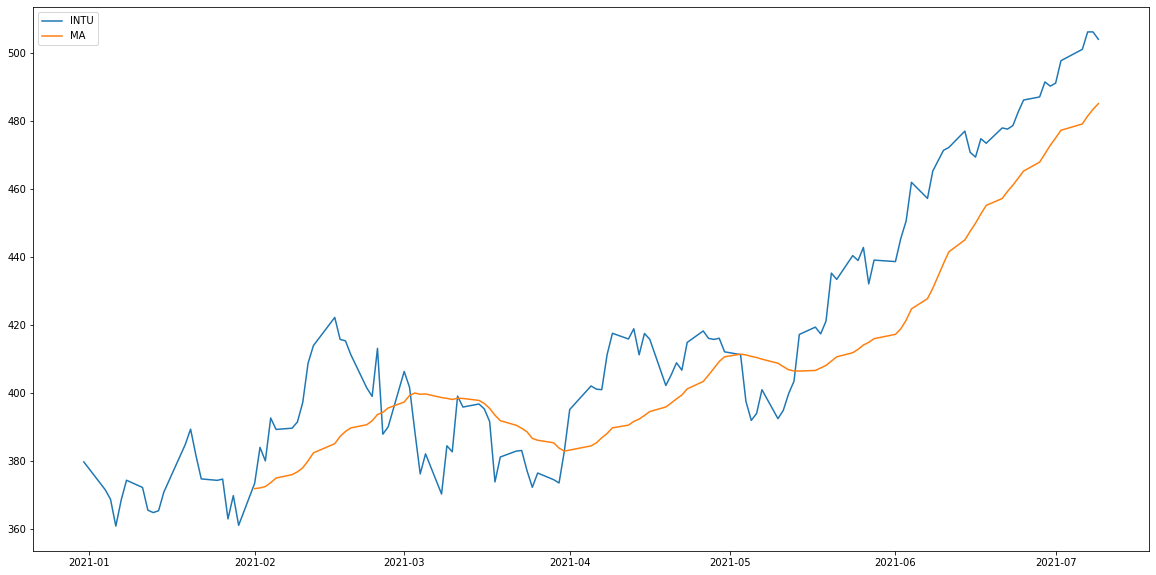

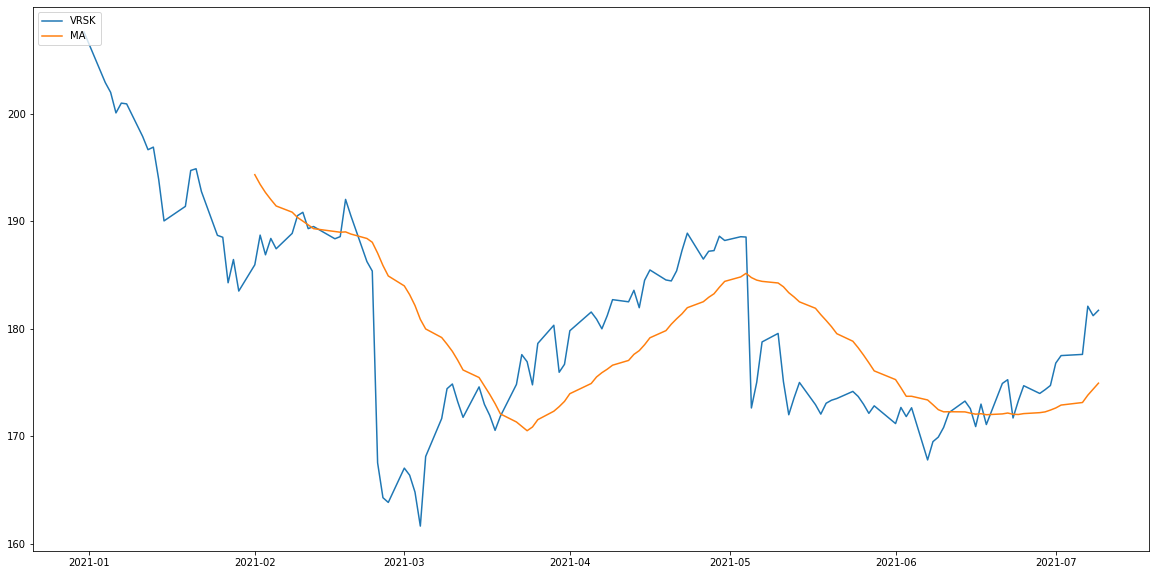

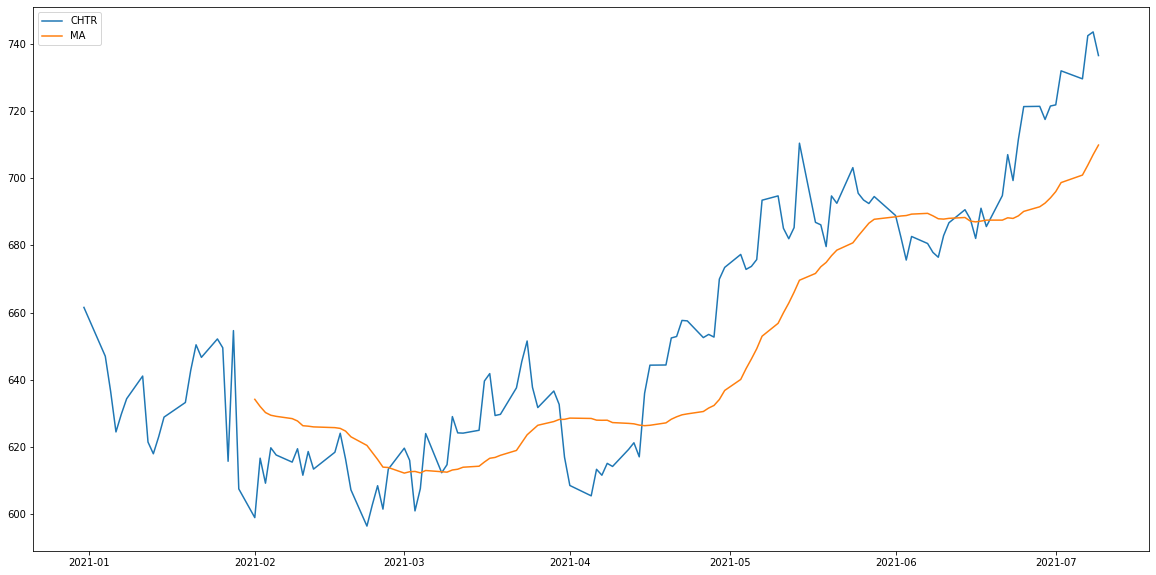

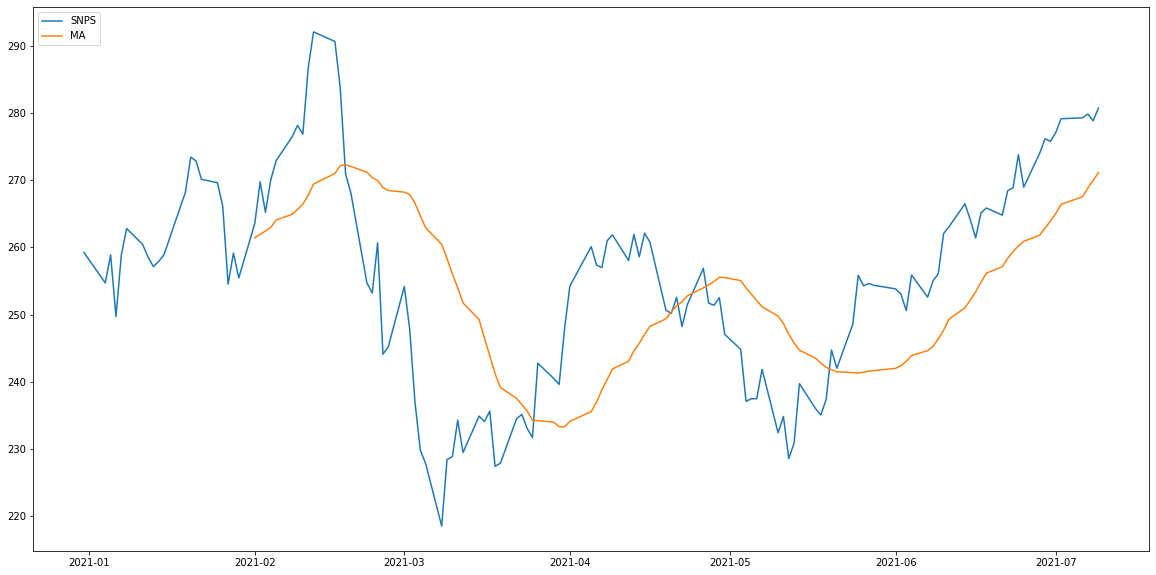

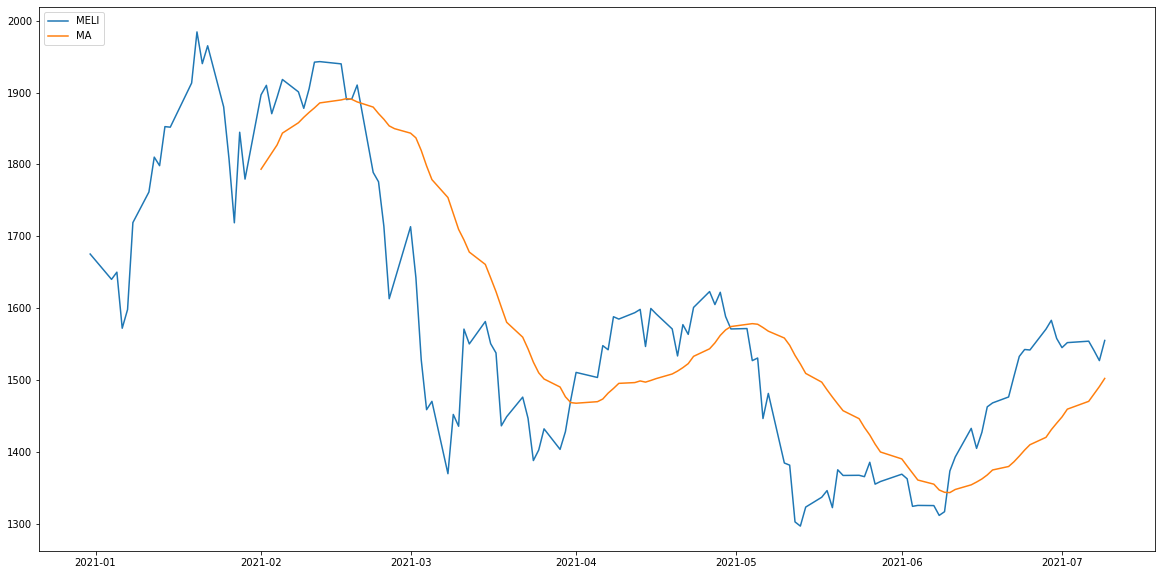

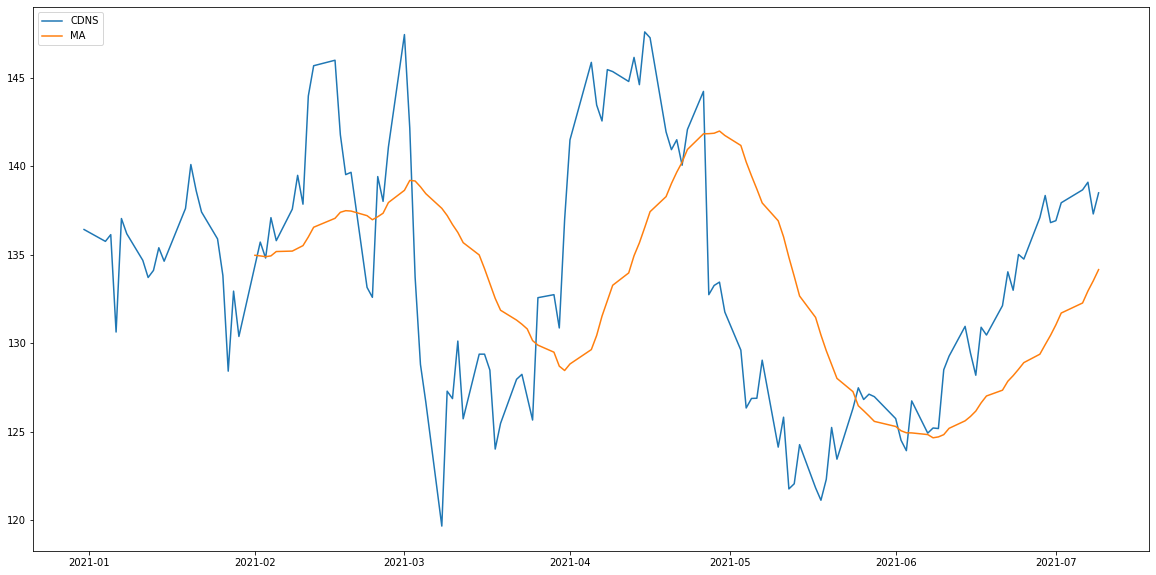

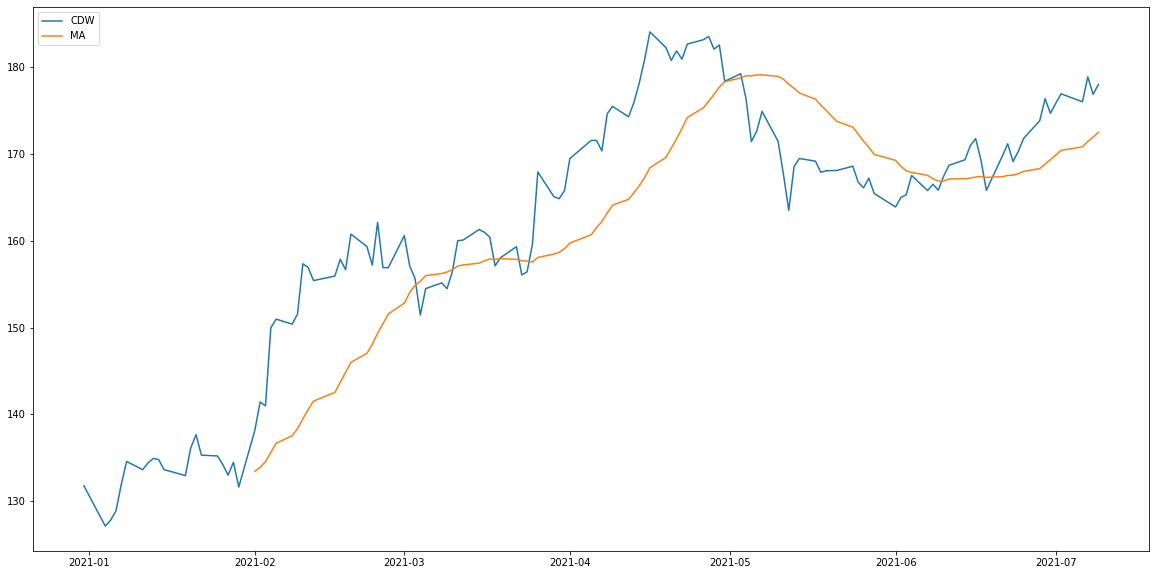

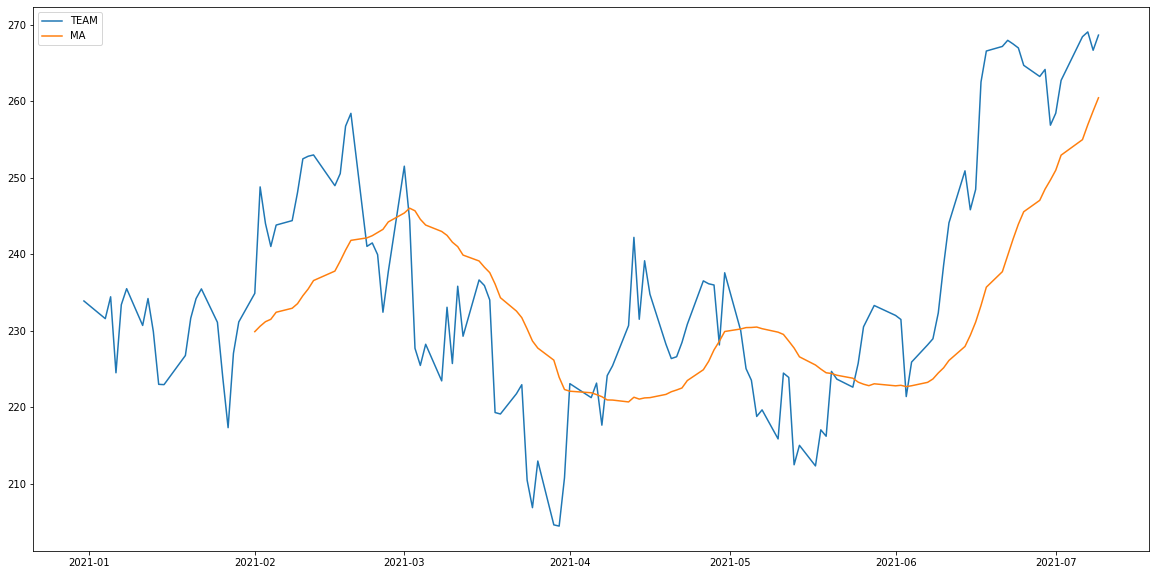

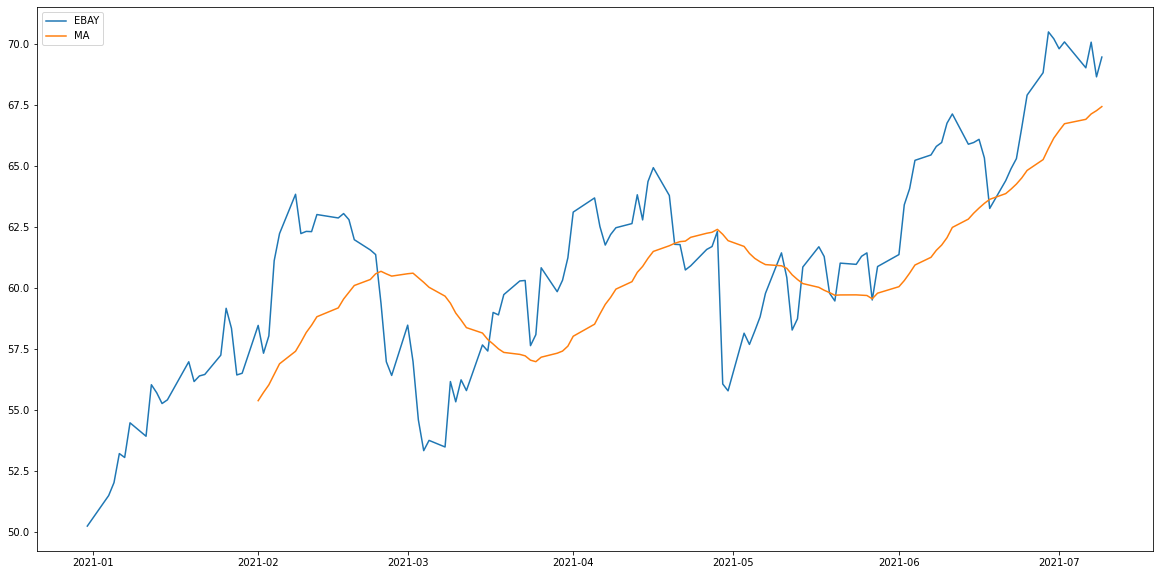

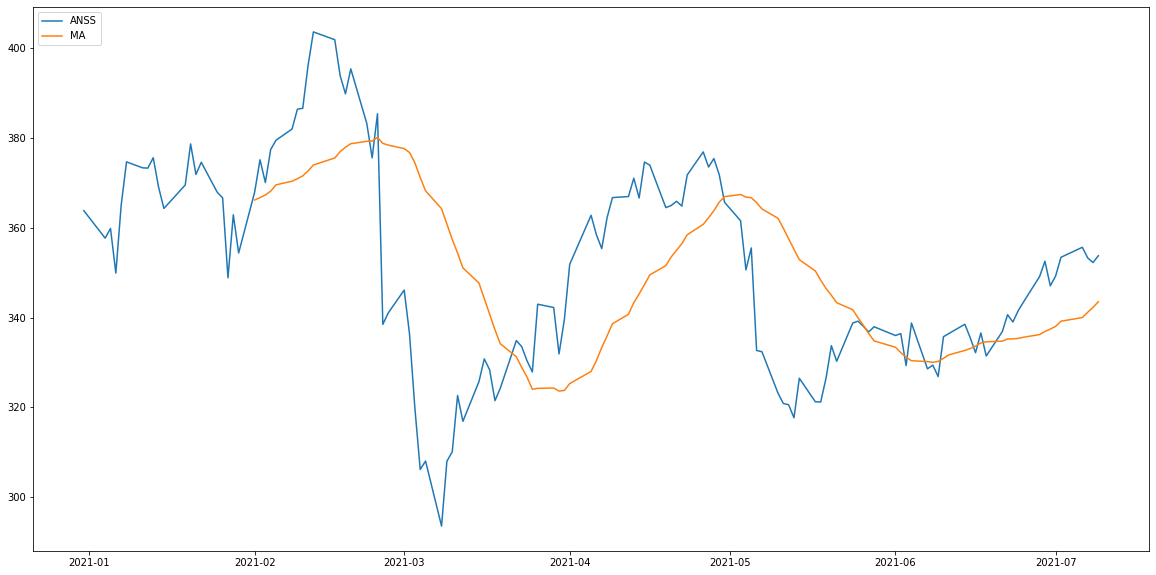

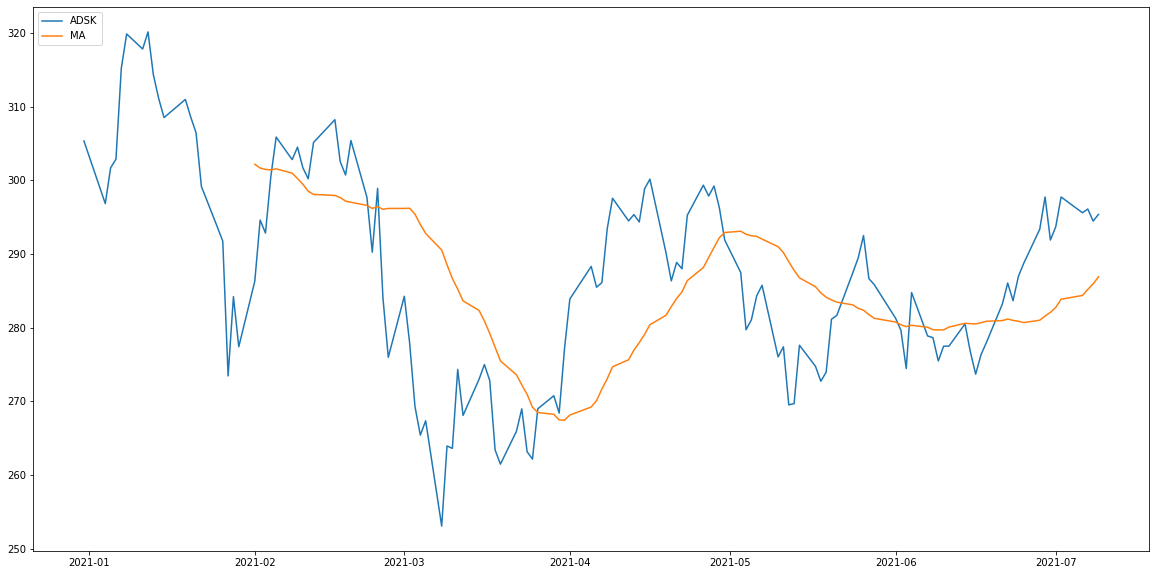

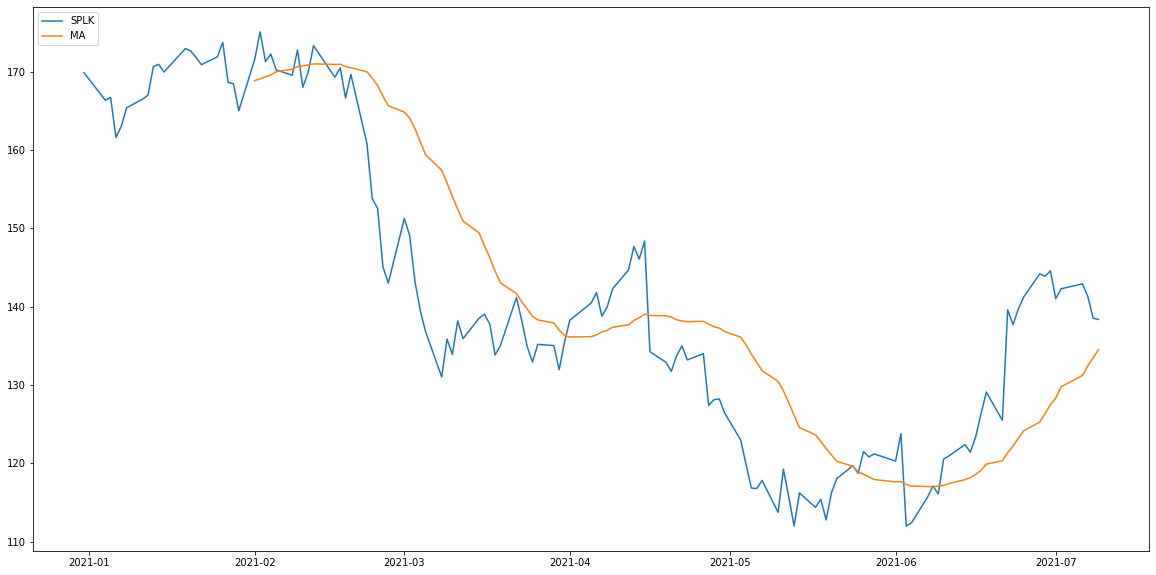

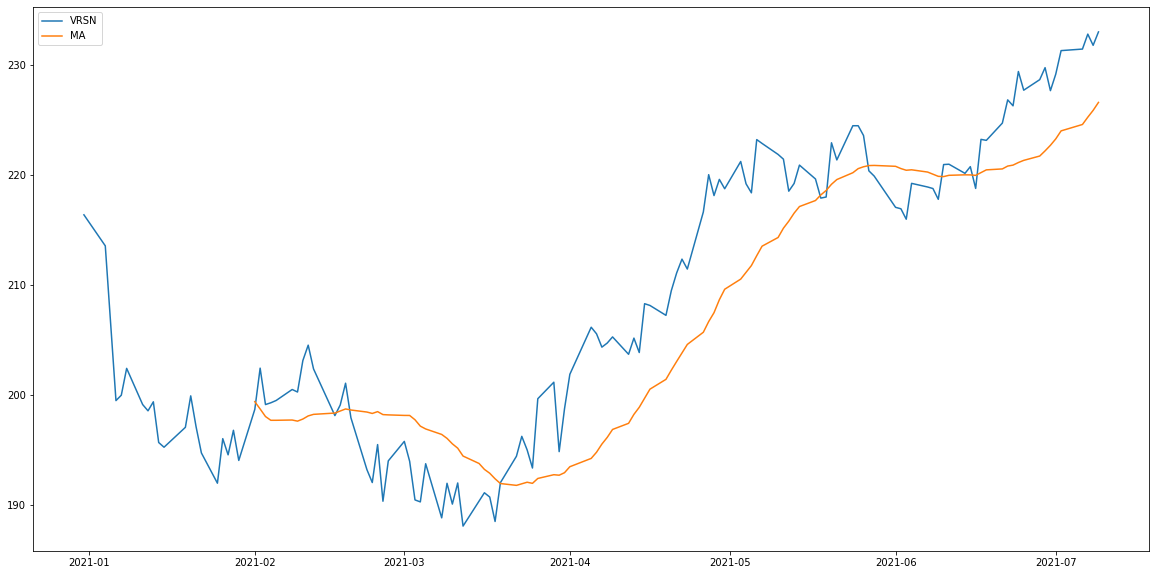

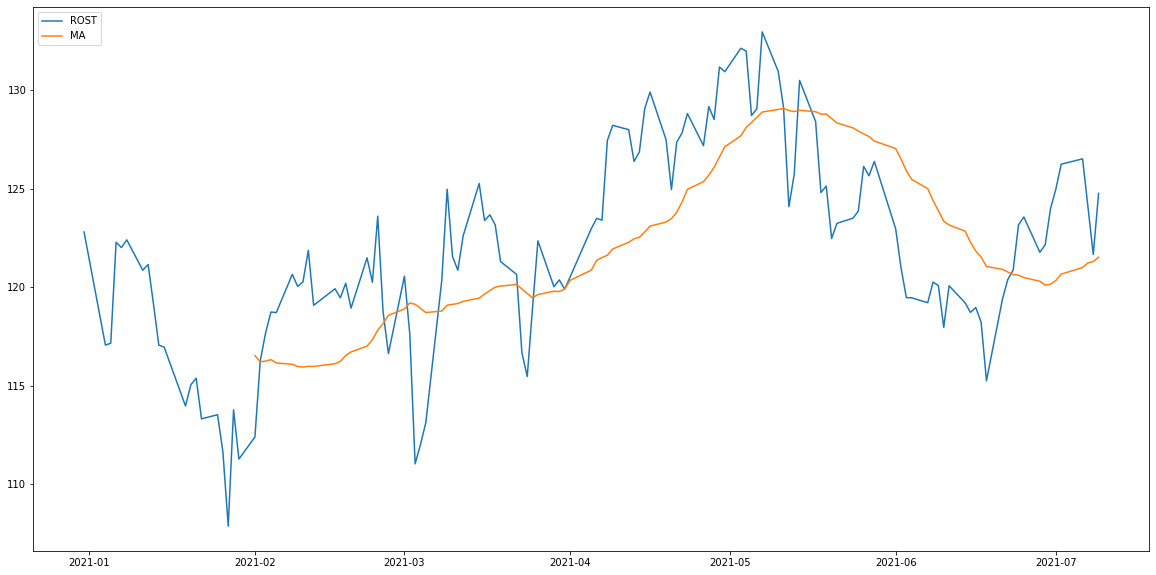

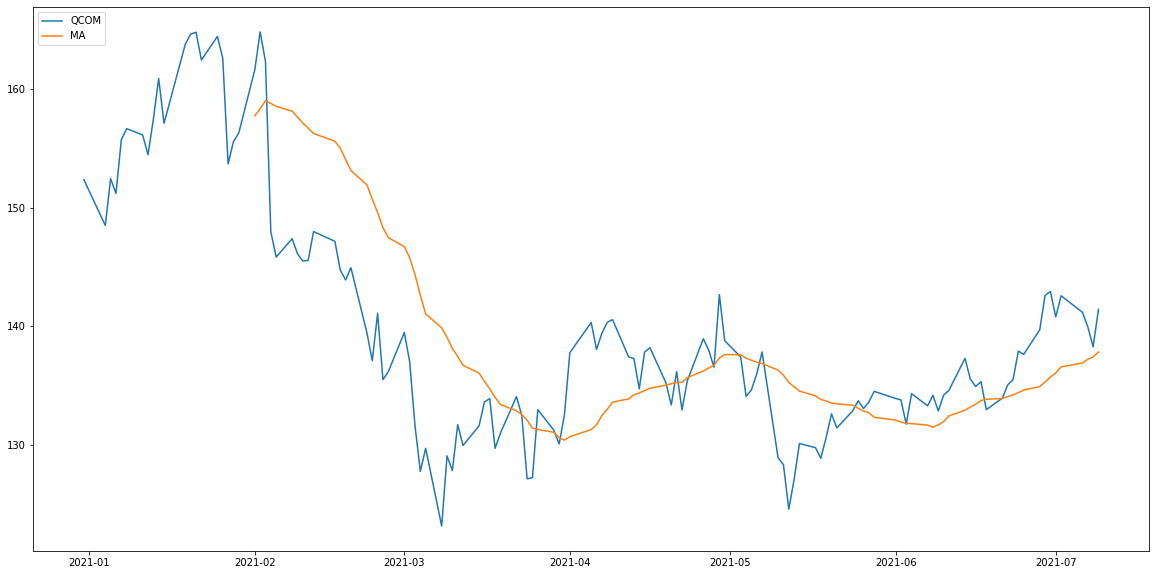

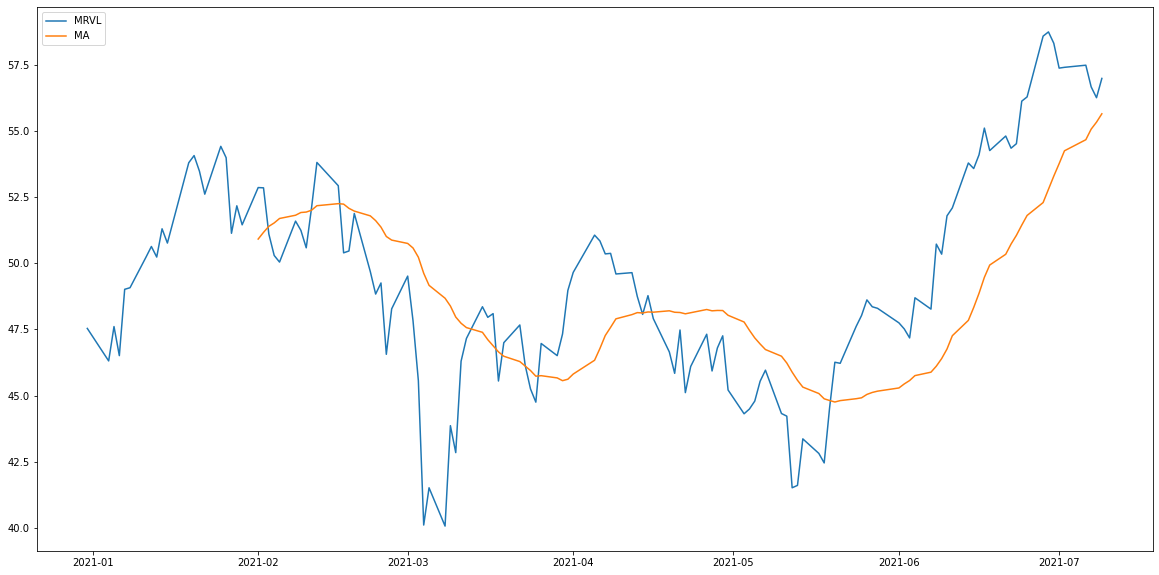

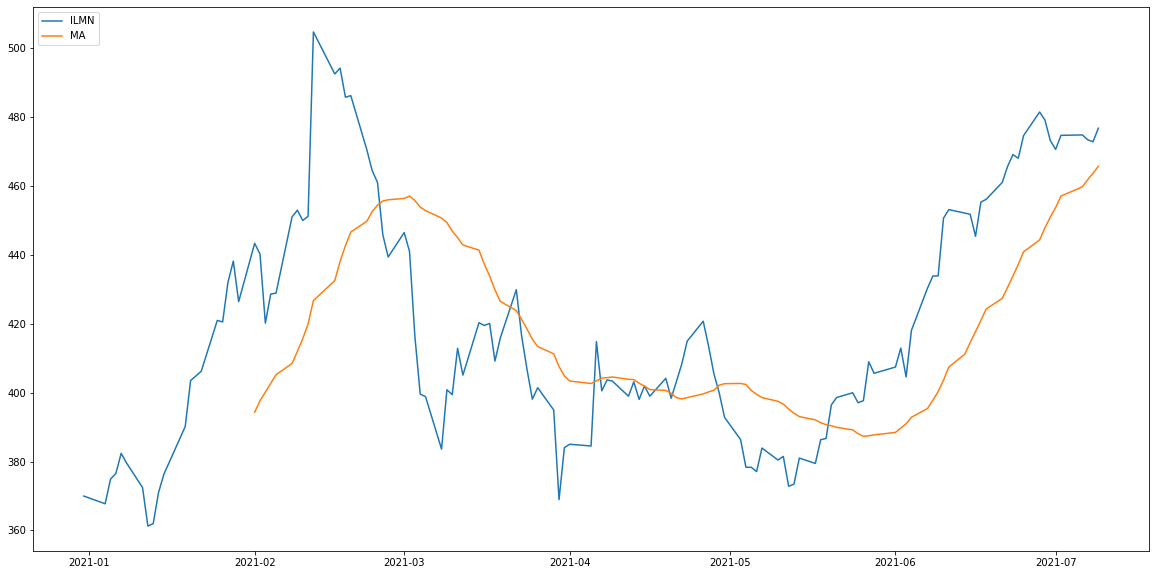

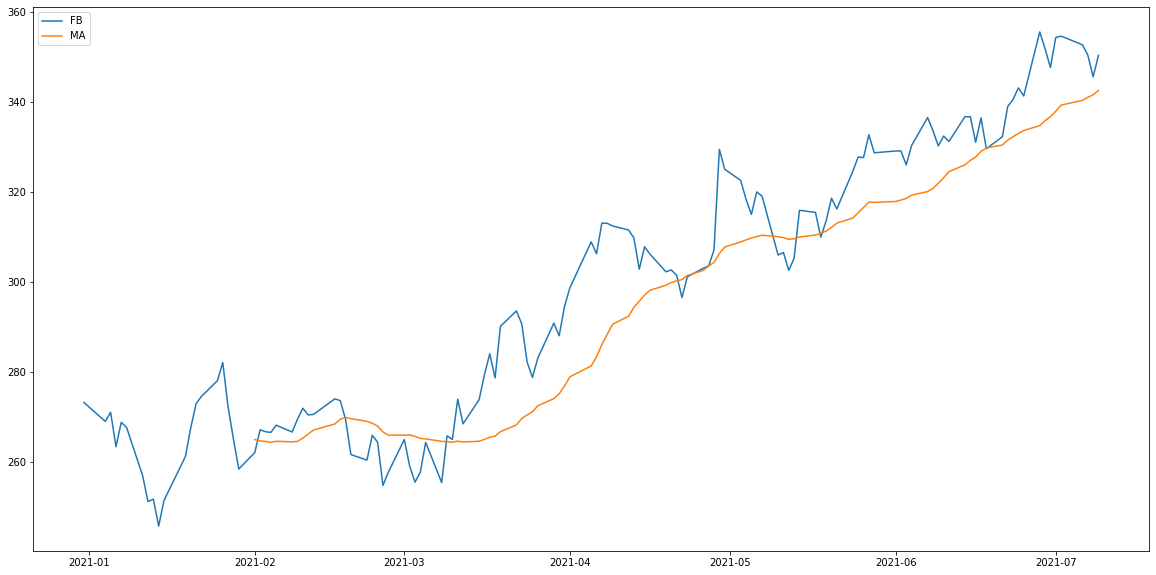

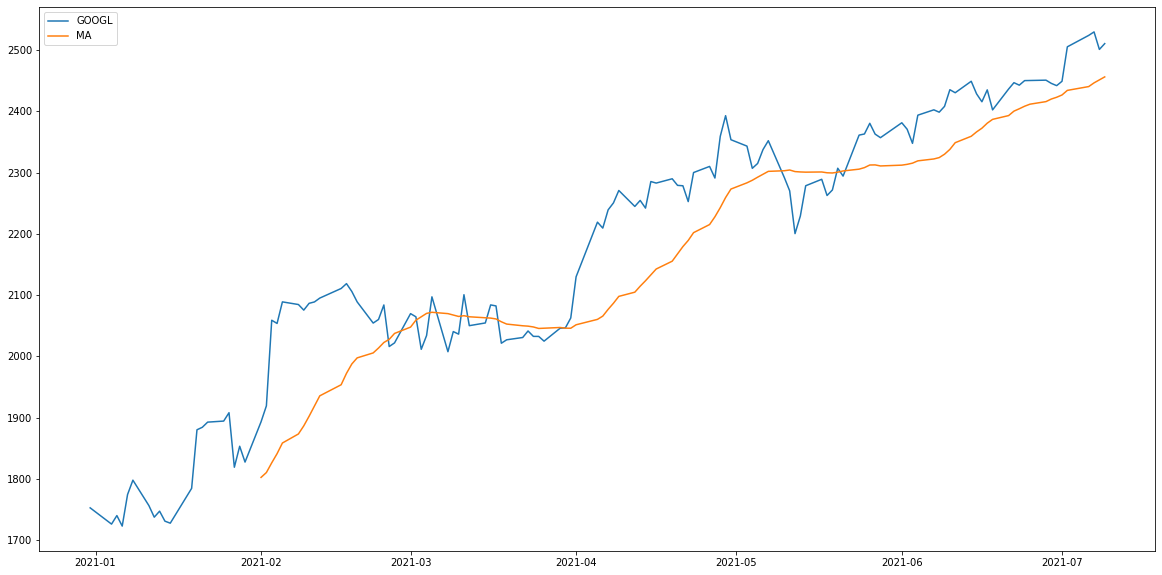

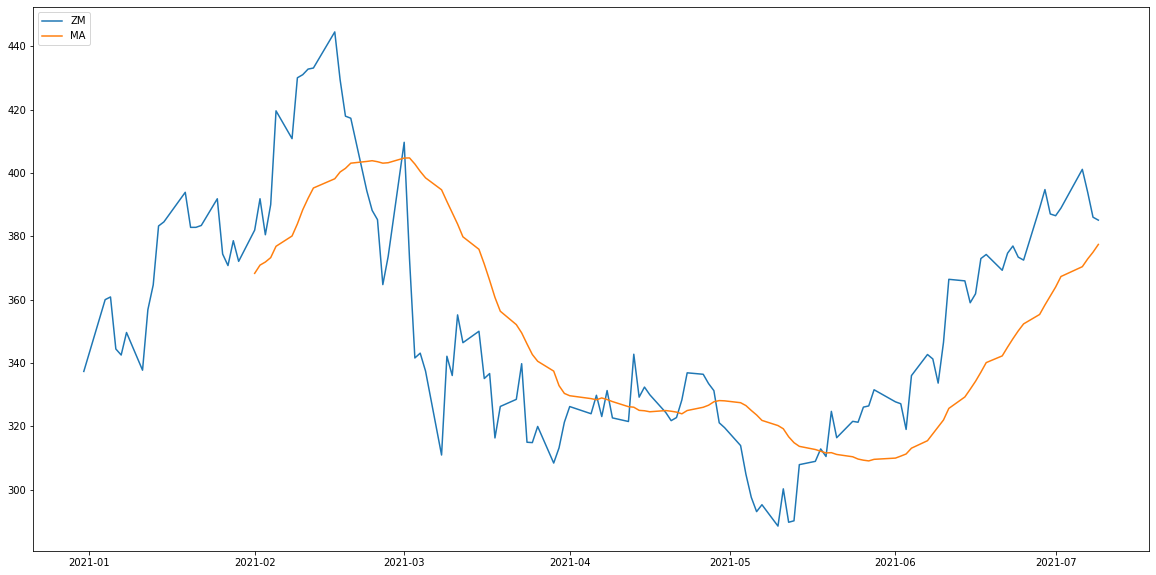

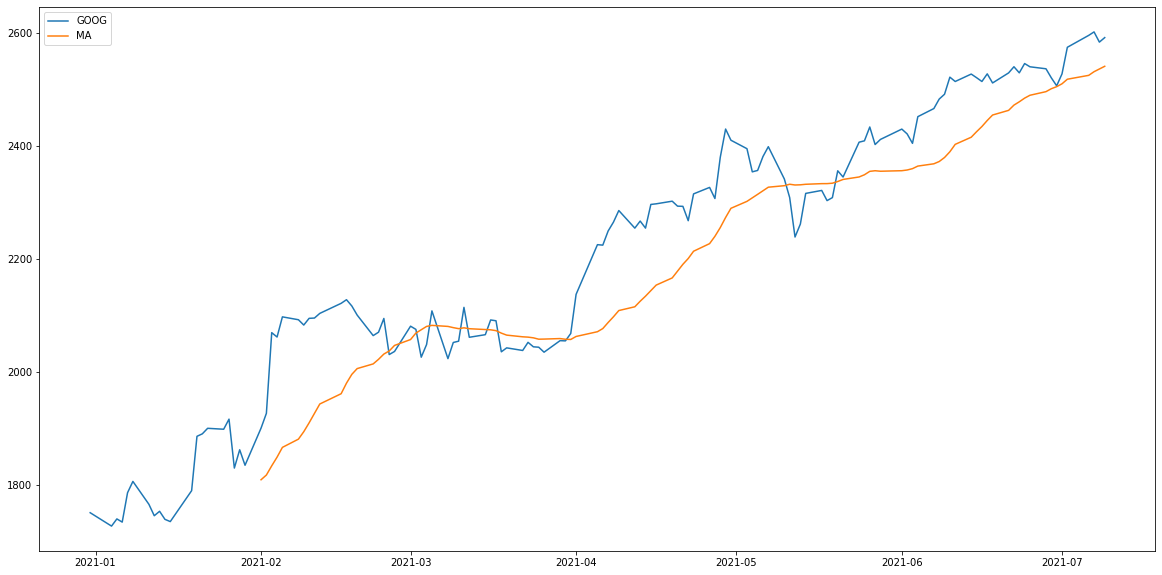

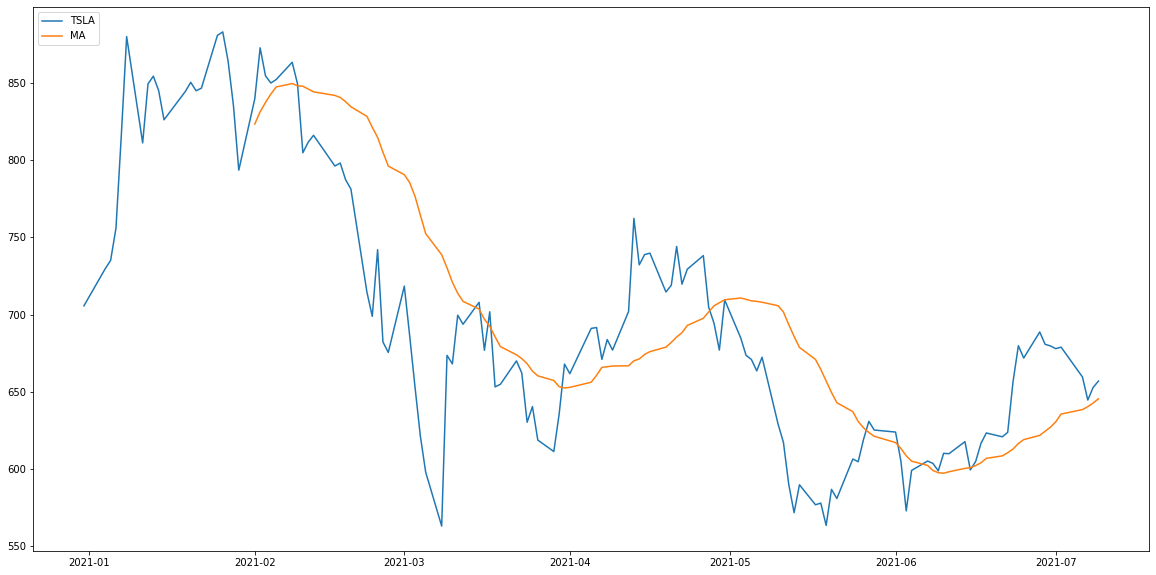

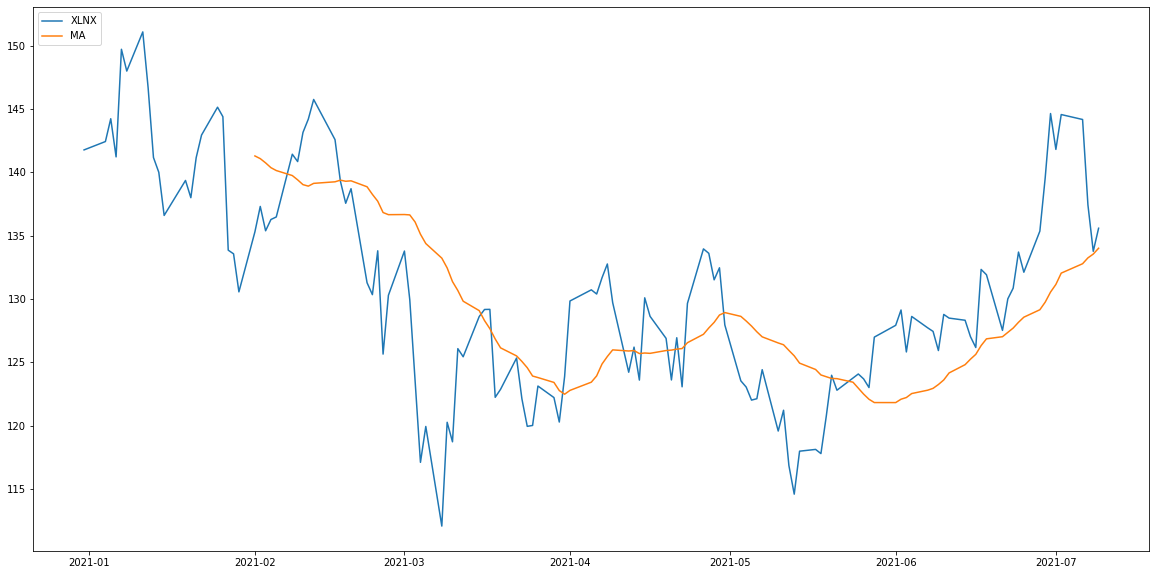

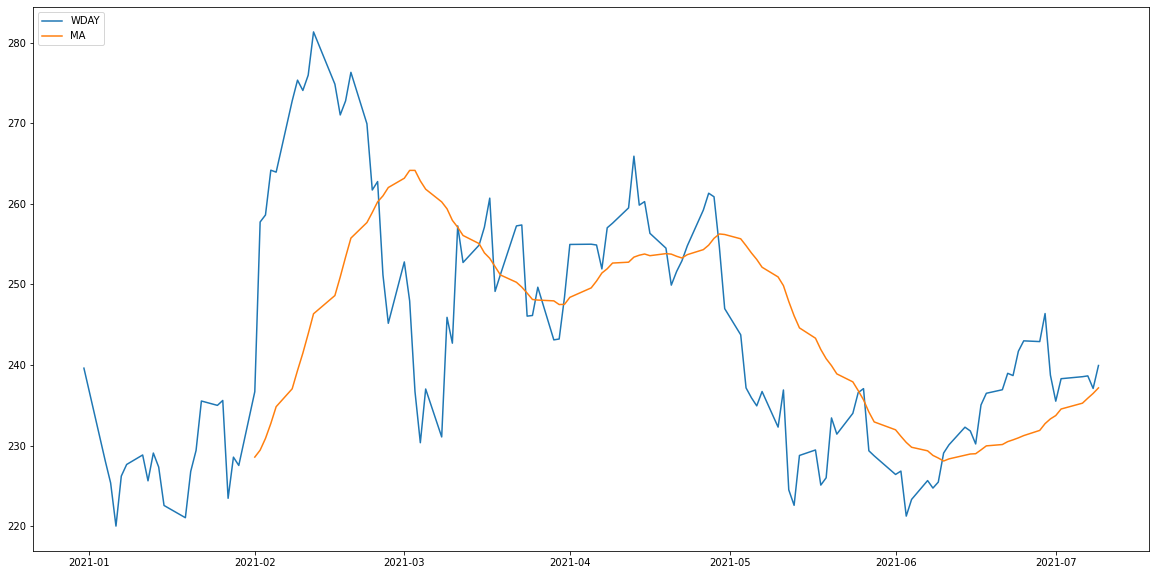

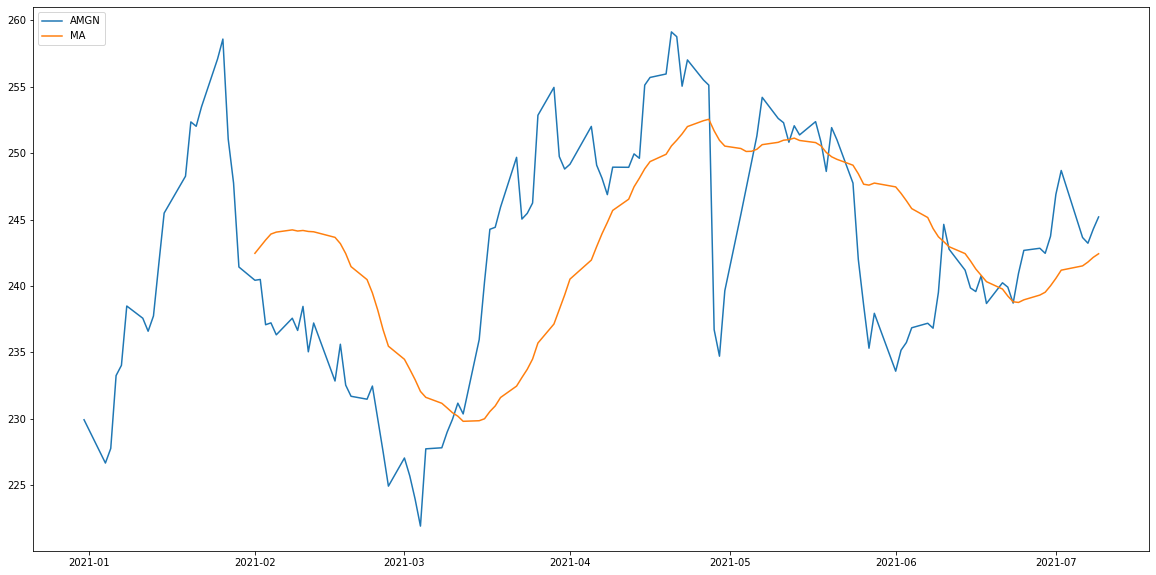

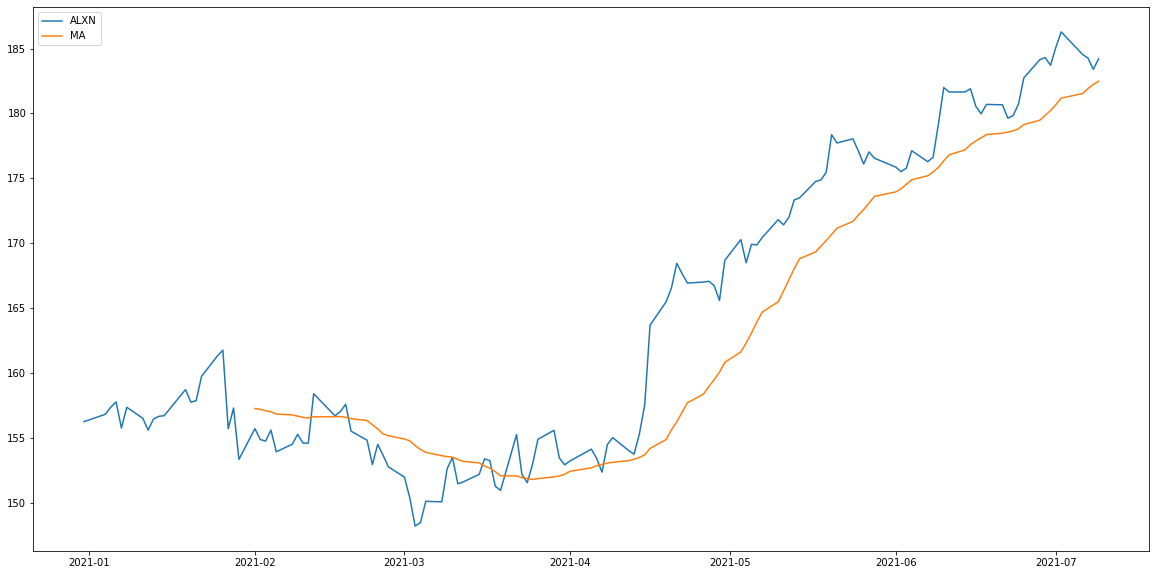

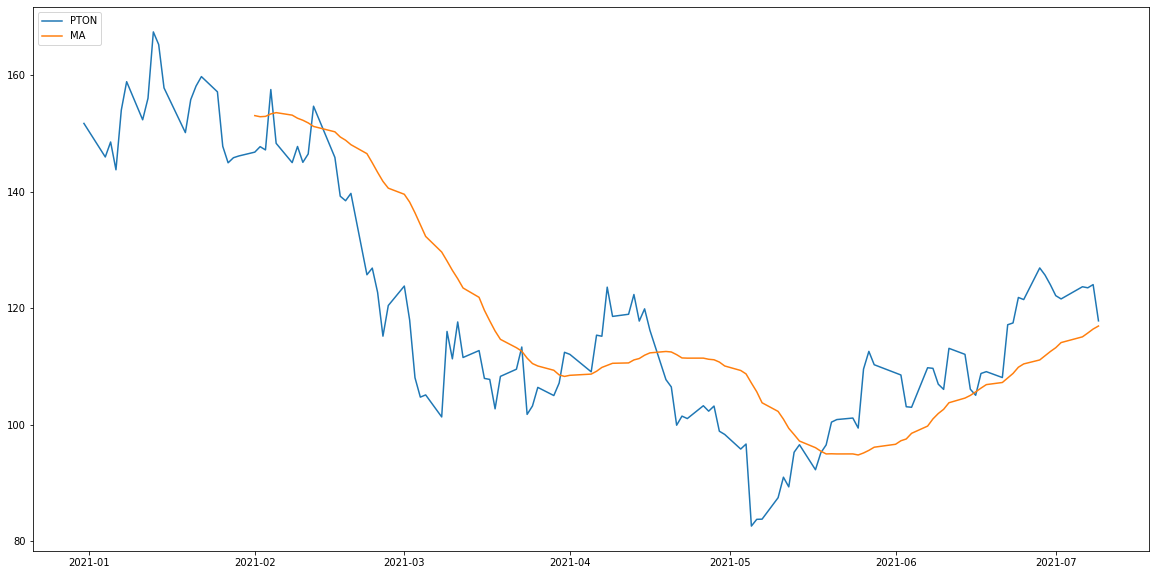

In [19]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);